## OC Parcours Datascience
## Projet 3: Concevoir une application au service de la santé publique
  
### Etudiant: Vincent GAGNOT

### Première partie: retraitement des données.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
import statsmodels.formula.api as smf
import statsmodels.api as sm

Import de la database (échantillon ou database totale).

In [3]:
data = pd.read_csv("en.openfoodfacts.org.products.csv", delimiter='\t', 
                   dtype={'code' : str, 
                          'first_packaging_code_geo' : str, 
                          'packaging_text' : str, 
                          'emb_codes' : str, 
                          'emb_codes_tags' : str, 
                          'cities_tags' : str,
                          'origins' : str,
                          'origins_tags' : str,
                          'manufacturing_places' : str,
                          'manufacturing_places_tags' : str,
                          'ingredients_from_palm_oil_tags' : str,
                          'brand_owner' : str}, 
                   nrows = 750000)

Suppression des doublons et petit nettoyage dans le nom des colonnes.

In [4]:
data = data.drop_duplicates()
data.columns = data.columns.str.replace('-', '_')
data.reset_index(drop=True)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,3431590000014,http://world-en.openfoodfacts.org/product/3431...,kiliweb,1507239946,2017-10-05T21:45:46Z,1598940687,2020-09-01T06:11:27Z,500G Sel Fin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749996,3431590000021,http://world-en.openfoodfacts.org/product/3431...,kiliweb,1506610862,2017-09-28T15:01:02Z,1588272370,2020-04-30T18:46:10Z,Sel Marin de l'Atlantique,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749997,3431590000052,http://world-en.openfoodfacts.org/product/3431...,kiliweb,1534504521,2018-08-17T11:15:21Z,1591007232,2020-06-01T10:27:12Z,Sel marin de l'Atlantique,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749998,3431590000090,http://world-en.openfoodfacts.org/product/3431...,sebleouf,1423059917,2015-02-04T14:25:17Z,1423214995,2015-02-06T09:29:55Z,Sauce spaghetti à la provençale,NaN,260 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Examens préliminaires de la base de données

La base de données est composée de 182 variables.  
Chaque ligne correspond à un produit, chaque colonne (182 donc) à un paramètre de ce produit.  
La BDD est accessible au grand public, à la fois pour consultation et remplissage. En conséquence, son nombre de lignes est en constante évolution, et la qualité des données (remplissage, notamment), est assez faible.     
  
Quels paramètres a-t-on pour chaque produit?

In [5]:
for i in range(len(data.columns)):
    print(data.columns[i])

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
main_category
main_category_en
image_url
image_small_url
image_ingredien

Premier test de remplissage - il y a beaucoup de colonnes vides ou peu remplies.

In [6]:
print("Total: " + str(len(data)) + " lignes")
for i in range(len(data.columns)):
    print(data.columns[i] + ": " + str(data.isna().sum(axis=0)[i]) + " vides.")

Total: 750000 lignes
code: 0 vides.
url: 0 vides.
creator: 1 vides.
created_t: 0 vides.
created_datetime: 0 vides.
last_modified_t: 0 vides.
last_modified_datetime: 0 vides.
product_name: 22547 vides.
generic_name: 701493 vides.
quantity: 596439 vides.
packaging: 651710 vides.
packaging_tags: 651715 vides.
packaging_text: 749968 vides.
brands: 337753 vides.
brands_tags: 337778 vides.
categories: 282457 vides.
categories_tags: 282457 vides.
categories_en: 282457 vides.
origins: 721542 vides.
origins_tags: 721577 vides.
manufacturing_places: 707699 vides.
manufacturing_places_tags: 707720 vides.
labels: 605703 vides.
labels_tags: 605706 vides.
labels_en: 605706 vides.
emb_codes: 694540 vides.
emb_codes_tags: 694557 vides.
first_packaging_code_geo: 706700 vides.
cities: 750000 vides.
cities_tags: 703342 vides.
purchase_places: 689574 vides.
stores: 651094 vides.
countries: 1912 vides.
countries_tags: 1912 vides.
countries_en: 1912 vides.
ingredients_text: 309948 vides.
allergens: 637494 v

### Nettoyage de la base de données:

#### Remplissage:

Après avoir travaillé sur les données, je constate que quelques colonnes très peu remplies peuvent poser des problèmes dans l'analyse (corrélations qui n'ont aucun sens par exemple).  
Je décide de supprimer les colonnes remplies à moins de 20%.  

In [7]:
data1 = data.copy()
print('Taille de départ: ' + str(data1.shape))
print(' ')
l = len(data1)
print('Colonnes peu remplies et supprimées:')
for i in reversed(range(len(data1.columns))):
    if data1.isna().sum(axis=0)[i] > (l * 0.8):
        print(data1.columns[i])
        data1 = data1.drop(columns = data1.columns[i], axis = 1)
print(' ')
print('Taille de fin'+ str(data1.shape))

Taille de départ: (750000, 182)
 
Colonnes peu remplies et supprimées:
carnitine_100g
inositol_100g
beta_glucan_100g
phylloquinone_100g
choline_100g
water_hardness_100g
glycemic_index_100g
nutrition_score_uk_100g
carbon_footprint_from_meat_or_fish_100g
carbon_footprint_100g
chlorophyl_100g
cocoa_100g
collagen_meat_protein_ratio_100g
fruits_vegetables_nuts_estimate_100g
fruits_vegetables_nuts_dried_100g
fruits_vegetables_nuts_100g
ph_100g
taurine_100g
caffeine_100g
iodine_100g
molybdenum_100g
chromium_100g
selenium_100g
fluoride_100g
manganese_100g
copper_100g
zinc_100g
magnesium_100g
phosphorus_100g
chloride_100g
potassium_100g
bicarbonate_100g
silica_100g
pantothenic_acid_100g
biotin_100g
vitamin_b12_100g
folates_100g
vitamin_b9_100g
vitamin_b6_100g
vitamin_pp_100g
vitamin_b2_100g
vitamin_b1_100g
vitamin_k_100g
vitamin_e_100g
vitamin_d_100g
beta_carotene_100g
alcohol_100g
nucleotides_100g
serum_proteins_100g
casein_100g
_insoluble_fiber_100g
_soluble_fiber_100g
polyols_100g
starch_100

In [8]:
print("Après modifications, sur un total de " + str(len(data1)) + " lignes, sont vides, pour chaque colonne:")
for i in range(len(data1.columns)):
    print(data1.columns[i] + ": " + str(data1.isna().sum(axis=0)[i]) + " vides.")

Après modifications, sur un total de 750000 lignes, sont vides, pour chaque colonne:
code: 0 vides.
url: 0 vides.
creator: 1 vides.
created_t: 0 vides.
created_datetime: 0 vides.
last_modified_t: 0 vides.
last_modified_datetime: 0 vides.
product_name: 22547 vides.
quantity: 596439 vides.
brands: 337753 vides.
brands_tags: 337778 vides.
categories: 282457 vides.
categories_tags: 282457 vides.
categories_en: 282457 vides.
countries: 1912 vides.
countries_tags: 1912 vides.
countries_en: 1912 vides.
ingredients_text: 309948 vides.
serving_size: 393966 vides.
serving_quantity: 393873 vides.
additives_n: 309947 vides.
additives_tags: 478797 vides.
additives_en: 478797 vides.
ingredients_from_palm_oil_n: 309947 vides.
ingredients_that_may_be_from_palm_oil_n: 309947 vides.
nutriscore_score: 374617 vides.
nutriscore_grade: 374617 vides.
nova_group: 352152 vides.
pnns_groups_1: 6026 vides.
pnns_groups_2: 125 vides.
states: 0 vides.
states_tags: 0 vides.
states_en: 0 vides.
brand_owner: 465694 vi

In [9]:
Données_numériques = []
Données_non_numériques = []
for i in data1.columns.tolist():
    if all(isinstance(e, (int, float)) for e in data1[i].unique()):
        Données_numériques.append(i)
               
    else:
        Données_non_numériques.append(i)

Les données restantes, par type, sont:

In [10]:
print('Données numériques:')
print(Données_numériques)
print(' ')
print('Données non numériques:')
print(Données_non_numériques)

Données numériques:
['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nova_group', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g', 'iron_100g', 'nutrition_score_fr_100g']
 
Données non numériques:
['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'serving_size', 'additives_tags', 'additives_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'brand_owner', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredi

#### Valeurs aberrantes: limite des 100g

Beaucoup de données sont en "pour 100g".  
Ce "pour 100g" indique le poids du composant pour 100g de produit. Une ligne dont un des composants, ou dont la somme des composants dépassera 100g sera incorrectement remplie et donc à exclure.  
Attention, certaines variables reprennent plusieurs fois les mêmes composants (par exemple, Fat et Saturated_fat). D'apès mes recherches, les variables sommables pour cette vérification sont:  'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'.
  
J'exclue les entrées qui dépassent les 100g dans une seule variables puis en somme .

In [11]:
def check_100g (row):
    check = False
    for i in Données_numériques:
        if i.endswith('100g') and not(i.startswith('energy') or i.startswith('carbon') or i.startswith('nutrition')):
            if row[i] > 100:
                check = True
    return check

In [12]:
data1['check_100g'] = data1.apply(lambda x: check_100g(x), axis = 1)

In [13]:
print("Exclu pour var > 100g: " + str(len(data1[data1['check_100g'] == True])) + " sur " + str(len(data1)))

Exclu pour var > 100g: 489 sur 750000


In [14]:
def check_100g_somme (row):
    check = False
    if ( (row['fat_100g'] + row['carbohydrates_100g'] + row['fiber_100g'] + row['proteins_100g'] + row['salt_100g']) > 100):
        check = True
    return check

In [15]:
data1['check_100g_somme'] = data1.apply(lambda x: check_100g_somme(x), axis = 1)

In [16]:
print("Exclu pour somme> 100g: " + str(len(data1[data1['check_100g_somme'] == True])) + " sur " + str(len(data1)))

Exclu pour somme> 100g: 36933 sur 750000


In [17]:
data1.drop(data1[data1['check_100g']==True].index, inplace=True)
data1.drop(data1[data1['check_100g_somme']==True].index, inplace=True)
data1 = data1.drop(columns = ['check_100g'])
data1 = data1.drop(columns = ['check_100g_somme'])

J'ajoute la variable 'isdrink'.  
Elle sera utile dans la mesure où le nutriscore est calculé différemment selon que le produit soit une boisson ou non.

In [18]:
def isdrink (row):
    output = False
    import math
    if row['pnns_groups_1'] == 'Beverages':
        output = True 
    return output

data1['isdrink'] = data1.apply(lambda x: isdrink(x), axis = 1)

if ('isdrink' in Données_non_numériques) == False:
    Données_non_numériques.append('isdrink')

#### Valeurs aberrantes: outliers

J'ai déjà décelé des valeurs étranges parmi les valeurs numériques. Je dois procéder à un nettoyage des valeurs aberrantes - je vais supprimer les lignes qui en contiennent.    
J'examine les différentes variables numériques en format boxplot, pour rechercher ces valeurs aberrantes.

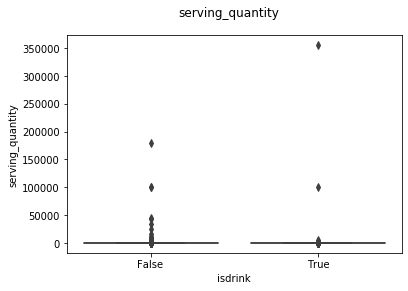

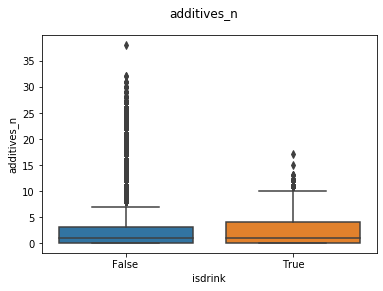

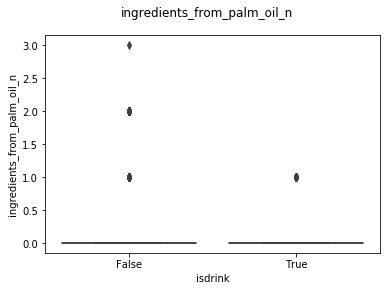

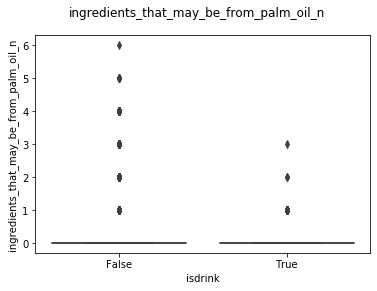

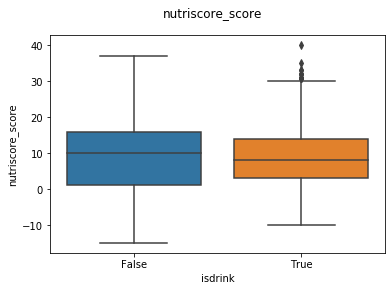

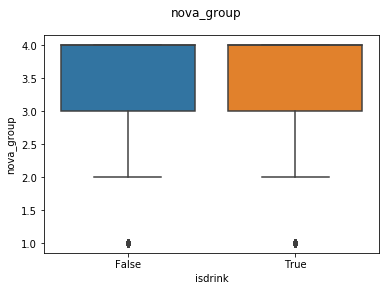

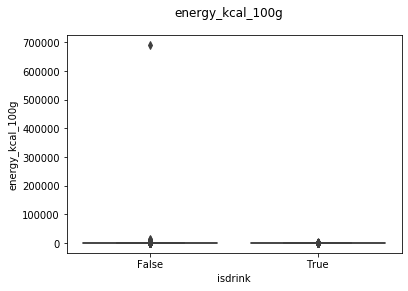

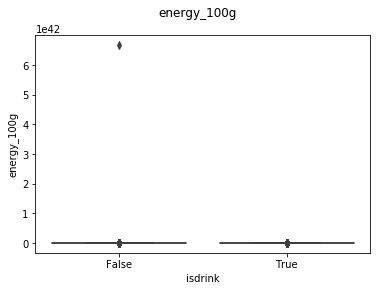

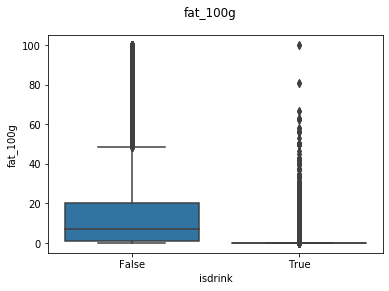

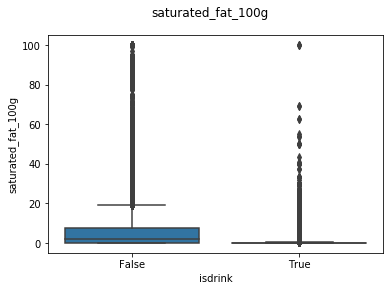

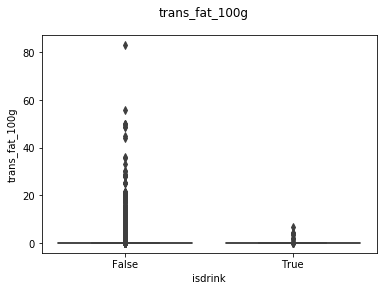

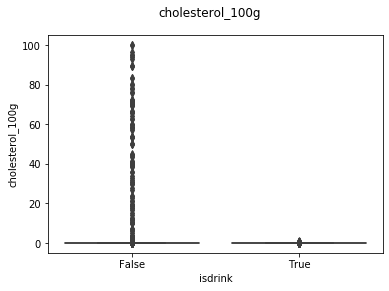

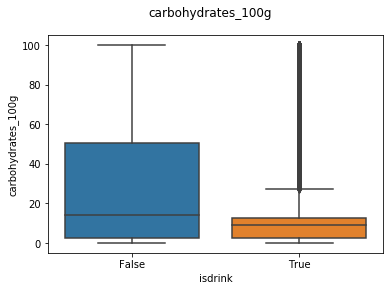

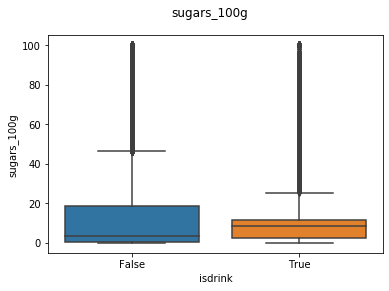

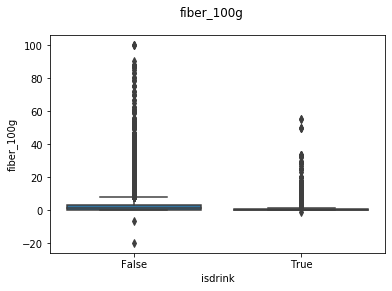

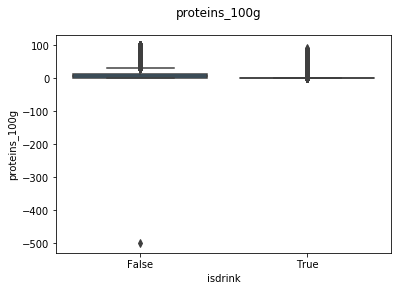

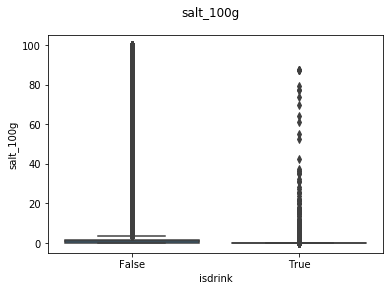

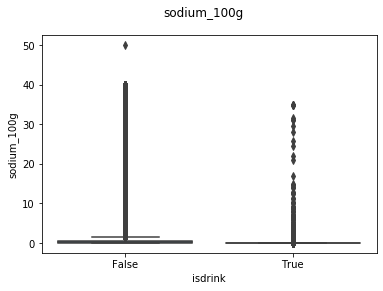

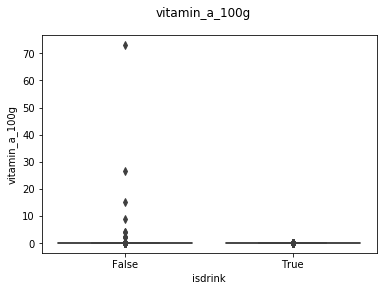

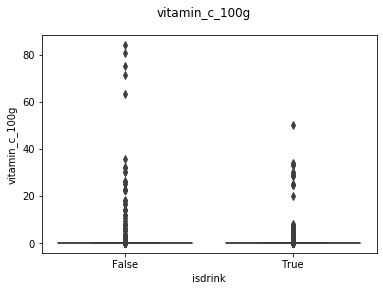

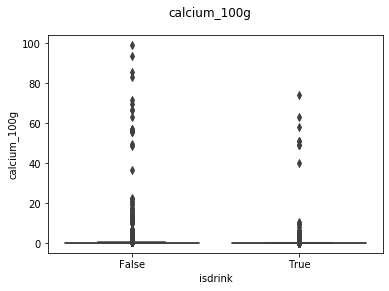

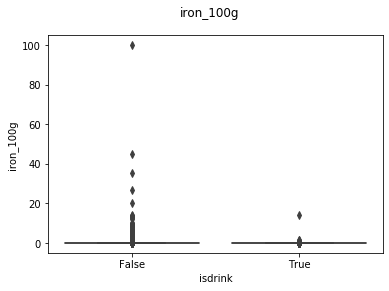

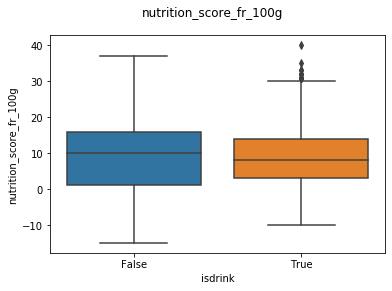

In [19]:
for c in Données_numériques:
    sns.boxplot(y = c,  data = data1, x = 'isdrink')
    plt.suptitle(c)
    plt.show()

La variable pnns_groups_2 étant très utile pour la suite de l'analyse, je choisis d'éliminer tous les individus pour lesquels cette variable n'est pas remplie (est 'unknown').

In [20]:
data1.drop(data1[data1['pnns_groups_2'] == 'unknown'].index, inplace=True)

Je vais faire un filtre sur certaines valeurs numériques en 2 étapes: 
 - De façon empirique, en examinant boxplot, individus particuliers, et en m'aidant de données techniques disponibles sur internet,
 - En utilisant les données interquartiles.  
Ce filtre s'appuyera sur le critère pnns_groups_2 et différenciera les boissons et le reste des individus.

Pour examiner chaque variable une par une, j'utilise un format du genre:

In [21]:
variable = 'fat_100g'
limite = 40
print(data1[['product_name', 'pnns_groups_2', variable]].loc[(data1['isdrink'] == False) & (data1[variable] >= limite)])
print(data1['pnns_groups_2'].loc[(data1['isdrink'] == False) & (data1[variable] >= limite)].unique())
print(data1[variable].loc[(data1['isdrink'] == False)].describe())

                                             product_name  \
380                          Organisé pesto alla genovese   
383                               Pesto à la roquette bio   
520               Foie gras de canard entier du sud-ouest   
710                            Huile d'olive vierge extra   
736     Véritable pâte à tartiner noisettes chocolat noir   
...                                                   ...   
748627                  Beurre demi sel moulé LES TULIPES   
748659                              Beurre Doux Plaquette   
748945                        Bloc de foie gras de canard   
749676                                 Amande decortiquée   
749967  Vinaigrette Légère Vinaigre Balsamique de Modè...   

                   pnns_groups_2   fat_100g  
380         Dressings and sauces  64.500000  
383         Dressings and sauces  53.200001  
520     Salty and fatty products  48.200000  
710                         Fats  92.000000  
736                       Sweets  48.

L'équivalent pour les boissons est celui-ci:

In [22]:
variable = 'fat_100g'
limite = 5
print(data1[['product_name', 'pnns_groups_2', variable]].loc[(data1['isdrink'] == True) & (data1[variable] >= limite)])
print(data1['pnns_groups_2'].loc[(data1['isdrink'] == True) & (data1[variable] >= limite)].unique())
print(data1[variable].loc[(data1['isdrink'] == True) & (data1['pnns_groups_2'] == 'Artificially sweetened beverages')].describe())

                                             product_name  \
1268                             Low fat milk alternative   
1269                              Chocolate morning moo's   
3823                                         Lait de coco   
3826                                         Lait de coco   
4208                            Christmas Cocoa Chocolate   
...                                                   ...   
740046  Nestle Clinutren HC / HP Vanille - 4 Bouteille...   
741195                Delical Effimax 2.0 Vanille 4X200ML   
741600                                     Iced Tea Peche   
742761                                       Lait de coco   
743765                       Glace caramel au beurre salé   

                           pnns_groups_2  fat_100g  
1268        Plant-based milk substitutes     14.71  
1269        Plant-based milk substitutes     10.00  
3823        Plant-based milk substitutes     28.00  
3826        Plant-based milk substitutes     17.40  
42

Après examen et recherches, j'ai établi une liste de filtres empiriques.  
Si les variables nommées dans la 1ère colonne, pour le groupe de produits de la 2e colonne, dépassent la valeur indique dans la 3e colonne, alors je soupçonne fortement un problème dans le remplissage de l'individu:

In [23]:
array_filtre_outliers_nodrink = [
    ['energy_kcal_100g', 'Biscuits and cakes', 550],
    ['energy_kcal_100g', 'Sweets', 550],
    ['energy_kcal_100g', 'Chocolate products', 550],
    ['energy_kcal_100g', 'pastries', 550],
    ['energy_kcal_100g', 'Dressings and sauces', 100],
    ['energy_kcal_100g', 'Fats', 100],
    ['energy_kcal_100g', 'autres', 550],
    ['energy_100g', 'autres', 3700],
    ['fat_100g', 'Fats', 100],
    ['fat_100g', 'Cheese', 60],
    ['fat_100g', 'Dressings and sauces', 40],
    ['fat_100g', 'Salty and fatty products', 40],
    ['fat_100g', 'Milk and yogurt', 40],
    ['fat_100g', 'One-dish meals', 30],
    ['fat_100g', 'Biscuits and cakes', 30],
    ['fat_100g', 'Milk and yogurt', 30],
    ['fat_100g', 'autres', 25],
    ['saturated_fat_100g', 'Fats', 100],
    ['saturated_fat_100g', 'Cheese', 40],
    ['saturated_fat_100g', 'Dressings and sauces', 20],
    ['saturated_fat_100g', 'Salty and fatty products', 20],
    ['saturated_fat_100g', 'Milk and yogurt', 20],
    ['saturated_fat_100g', 'One-dish meals', 15],
    ['saturated_fat_100g', 'Biscuits and cakes', 15],
    ['saturated_fat_100g', 'Milk and yogurt', 15],
    ['saturated_fat_100g', 'autres', 12],
    ['trans_fat_100g', 'Fats', 100],
    ['trans_fat_100g', 'Cheese', 6],
    ['trans_fat_100g', 'Dressings and sauces', 4],
    ['trans_fat_100g', 'Salty and fatty products', 4],
    ['trans_fat_100g', 'Milk and yogurt', 4],
    ['trans_fat_100g', 'One-dish meals', 3],
    ['trans_fat_100g', 'Biscuits and cakes', 3],
    ['trans_fat_100g', 'Milk and yogurt', 3],
    ['trans_fat_100g', 'autres', 2],
    ['cholesterol_100g', 'autres', 1],
    ['carbohydrates_100g', 'Sweets', 100],
    ['carbohydrates_100g', 'Cereals', 95],
    ['carbohydrates_100g', 'Breakfast cereals', 95],
    ['carbohydrates_100g', 'Biscuits and cakes', 95],
    ['carbohydrates_100g', 'Chocolate products', 95],
    ['carbohydrates_100g', 'Alcoholic beverages', 95],
    ['carbohydrates_100g', 'Fruits', 30],
    ['carbohydrates_100g', 'autres', 80],
    ['sugars_100g', 'Sweets', 100],
    ['sugars_100g', 'Cereals', 90],
    ['sugars_100g', 'Breakfast cereals', 90],
    ['sugars_100g', 'Biscuits and cakes', 90],
    ['sugars_100g', 'Chocolate products', 90],
    ['sugars_100g', 'Alcoholic beverages', 90],
    ['sugars_100g', 'Fruits', 30],
    ['sugars_100g', 'autres', 60],
    ]



array_filtre_outliers_drink = [
    ['energy_kcal_100g', 'Sweetened beverages', 200],
    ['energy_kcal_100g', 'Artificially sweetened beverages', 200],
    ['energy_kcal_100g', 'autres', 150],
    ['energy_100g', 'autres', 3700],
    ['fat_100g', 'Plant-based milk substitutes', 15],
    ['fat_100g', 'autres', 8],
    ['fat_100g', 'Plant-based milk substitutes', 10],
    ['fat_100g', 'autres', 8],
    ['cholesterol_100g', 'autres', 1],
    ['carbohydrates_100g', 'autres', 80],
    ['sugars_100g', 'Sweetened beverages', 100],
    ['sugars_100g', 'Artificially sweetened beverages', 90],
    ['sugars_100g', 'autres', 60],
    ]

df_filtre_outliers_nodrink = pd.DataFrame(array_filtre_outliers_nodrink, columns=['variable', 'pnns_groups_2', 'limite'])
df_filtre_outliers_drink = pd.DataFrame(array_filtre_outliers_drink, columns=['variable', 'pnns_groups_2', 'limite'])

Sur la base de ces valeurs, je marque les outliers "empiriques".

In [24]:
def check_outliers_empirique (row):
    output = False
    if row['isdrink'] == True:
        for i in list(df_filtre_outliers_drink['variable'].unique()):
            if not(np.isnan(row[i])):
                if row['pnns_groups_2'] in list(df_filtre_outliers_drink['pnns_groups_2'].loc[df_filtre_outliers_drink['variable'] == i].unique()):
                    if row[i] >= df_filtre_outliers_drink['limite'].loc[(df_filtre_outliers_drink['variable'] == i) & (df_filtre_outliers_drink['pnns_groups_2'] == row['pnns_groups_2'])].iloc[0]:
                        output = True
                else:
                    if row[i] >= df_filtre_outliers_drink['limite'].loc[(df_filtre_outliers_drink['variable'] == i) & (df_filtre_outliers_drink['pnns_groups_2'] == 'autres')].iloc[0]:
                        output = True
    if row['isdrink'] == False:
        for i in list(df_filtre_outliers_nodrink['variable'].unique()):
            if not(np.isnan(row[i])):
                if row['pnns_groups_2'] in list(df_filtre_outliers_nodrink['pnns_groups_2'].loc[df_filtre_outliers_nodrink['variable'] == i].unique()):
                    if row[i] >= df_filtre_outliers_nodrink['limite'].loc[(df_filtre_outliers_nodrink['variable'] == i) & (df_filtre_outliers_nodrink['pnns_groups_2'] == row['pnns_groups_2'])].iloc[0]:
                        output = True
                else:
                    if row[i] >= df_filtre_outliers_nodrink['limite'].loc[(df_filtre_outliers_nodrink['variable'] == i) & (df_filtre_outliers_nodrink['pnns_groups_2'] == 'autres')].iloc[0]:
                        output = True
    return output

In [25]:
data1['check_empirique'] = data1.apply(lambda x: check_outliers_empirique(x), axis = 1)

J'exclue maintenant les outliers statistiques.  
Je choisis une limite calquée sur le comportement des boxplot Python: Q3 + 1.5xIQR (IQR = Q3-Q1).
Les variables concernées sont:
 - 'nutriscore_score'
 - 'energy_kcal_100g'
 - 'energy_100g'
 - 'fat_100g'
 - 'saturated_fat_100g'
 - 'trans_fat_100g'
 - 'cholesterol_100g'
 - 'carbohydrates_100g'
 - 'sugars_100g'
 - 'fiber_100g'
 - 'proteins_100g'
 - 'salt_100g'
 - 'sodium_100g'

In [26]:
lim_statistique = []
for l in data1['pnns_groups_2'].unique():
    lim_l = [l]
    for k in ['nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
        lim_l = lim_l + [data1[k][data1['pnns_groups_2'] == l].mean() + 2*data1[k][data1['pnns_groups_2'] == l].std()]
    lim_statistique.append(lim_l)
df_lim_statistique = pd.DataFrame(lim_statistique, columns=['pnns_groups_2', 'nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'])

Le tableau des limites supérieures:

In [27]:
df_lim_statistique

,pnns_groups_2,nutriscore_score,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,Dressings and sauces,25.090185,524.606135,2203.325164,50.817672,9.861115,1.187830,1.747886,45.275198,34.816189,5.400470,9.981745,9.264293,3.705721
1,One-dish meals,16.152905,395.650986,1608.898811,19.647421,7.319824,0.399397,3.252247,56.019768,9.470968,5.684102,18.275811,6.651391,2.660560
2,Biscuits and cakes,29.428468,590.559880,2458.502564,33.327332,18.282452,1.399247,3.764314,86.911885,56.355774,6.796421,12.275005,3.366041,1.346414
3,Fruits,4.314648,236.512802,996.526227,9.537116,6.764201,0.000000,0.001638,50.026956,43.049554,4.964986,4.370132,1.560574,0.624225
4,Meat,19.734077,400.188323,1640.646864,26.212537,10.326189,1.548827,3.978129,16.302370,8.971195,3.743552,33.235409,4.462878,1.785151
5,Cheese,22.914031,528.250861,2186.774069,43.482642,28.941924,1.233258,4.151356,12.788485,7.087916,1.902928,35.798799,4.159324,1.663728
6,Bread,13.716552,430.624217,1816.685256,15.679693,4.804243,0.229703,0.165446,72.097308,15.009032,9.634994,15.021294,2.762812,1.104624
7,Fish and seafood,16.751684,334.434341,1390.920098,23.447666,5.356352,0.914188,3.567894,15.241421,4.660491,6.344275,30.614312,5.936429,2.374571
8,Sweets,28.538796,586.406818,2457.041930,30.989404,19.778993,1.071767,1.458315,112.823080,101.499624,6.064647,8.453384,2.420688,0.968287
9,Salty and fatty products,27.573962,673.075005,2804.641556,69.107833,28.758264,6.299856,0.063619,15.501284,5.513571,8.882253,18.723550,6.258265,2.503309


In [28]:
def check_outliers_statistique (row):
    output = False
    for i in ['nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
        if not(np.isnan(row[i])) and not(np.isnan(df_lim_statistique[k][df_lim_statistique['pnns_groups_2'] == row['pnns_groups_2']].iloc[0])):
            if row[i] >= df_lim_statistique[i][df_lim_statistique['pnns_groups_2'] == row['pnns_groups_2']].iloc[0]:
                output = True
    return output

In [29]:
data1['check_statistique'] = data1.apply(lambda x: check_outliers_statistique(x), axis = 1)

Les lignes sélectionnées comme étant à éliminer selon ces critères:

In [30]:
data1[data1['check_statistique'] == True][['pnns_groups_2', 'nutriscore_score', 'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']]

,pnns_groups_2,nutriscore_score,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
69,One-dish meals,17.0,235.0,983.0,15.0,7.5,NaN,NaN,1.00,1.00,NaN,24.0,2.00000,0.800000
108,Fruit juices,0.0,221.0,925.0,0.5,0.1,NaN,NaN,0.01,0.01,NaN,0.5,0.01000,0.004000
165,Sweets,2.0,5.0,21.0,39.6,5.8,NaN,NaN,42.80,12.80,NaN,8.7,0.20000,0.080000
175,Legumes,NaN,333.0,1393.0,NaN,NaN,NaN,NaN,62.22,8.89,26.7,20.0,0.02794,0.011176
270,Fruits,3.0,300.0,1255.0,0.0,0.0,0.0,0.0,83.33,66.67,10.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749709,Processed meat,15.0,265.0,1109.0,33.0,33.0,NaN,NaN,0.80,0.71,NaN,15.8,0.67300,0.269200
749771,Pizza pies and quiche,22.0,324.0,1357.0,17.0,8.2,NaN,NaN,27.00,0.90,NaN,15.0,2.40000,0.960000
749773,Pizza pies and quiche,11.0,255.0,1067.0,14.0,6.4,NaN,NaN,14.00,1.80,NaN,17.0,0.60000,0.240000
749837,Sweets,NaN,304.0,1272.0,NaN,0.0,NaN,NaN,NaN,82.00,0.2,0.3,4.00000,1.600000


J'élimine les outliers statistiques et empiriques.

In [31]:
data1.drop(data1[data1['check_statistique'] == True].index, inplace=True)
data1.drop(data1[data1['check_empirique'] == True].index, inplace=True)
data1 = data1.drop(columns = ['check_statistique'])
data1 = data1.drop(columns = ['check_empirique'])

### Analyse univariée

Une partie des colonnes correspondent à des données numériques. Pour ces données, je fais un histogramme montrant la répartition des données.  
Pour les autres, je peux aussi faire un histogramme si le nombre de valeurs différentes est limité.  
Je fais également un diagramme circulaire pour représenter les valeurs encore manquantes.  
  
J'en profite pour faire une liste de valeurs numériques et une autre de valeurs non numériques.

C:\Users\vince\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vince\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


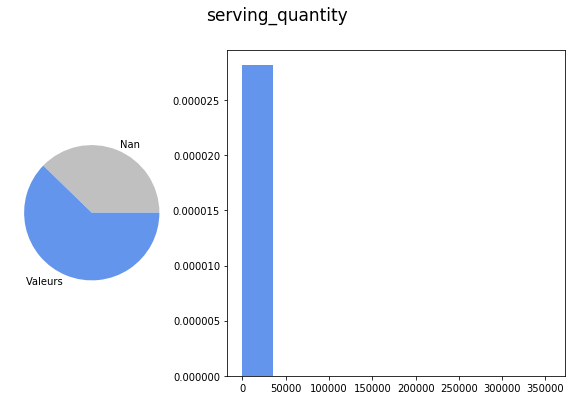

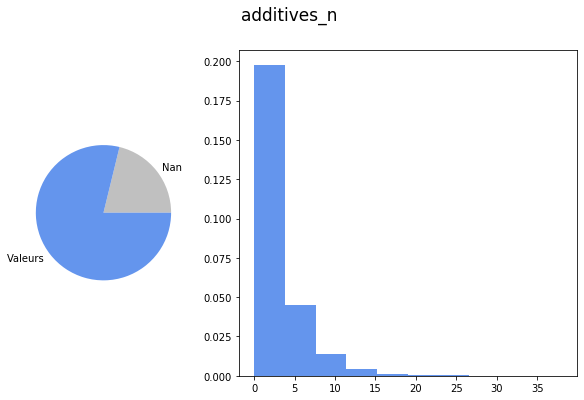

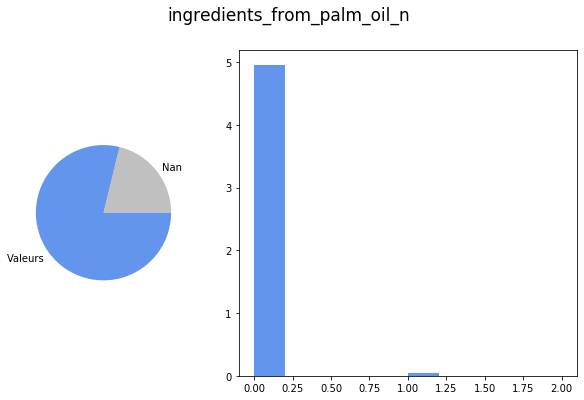

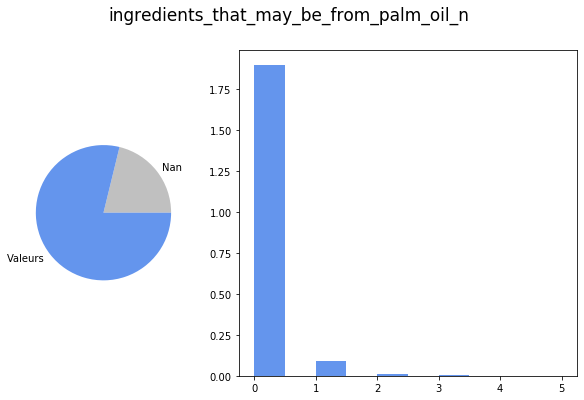

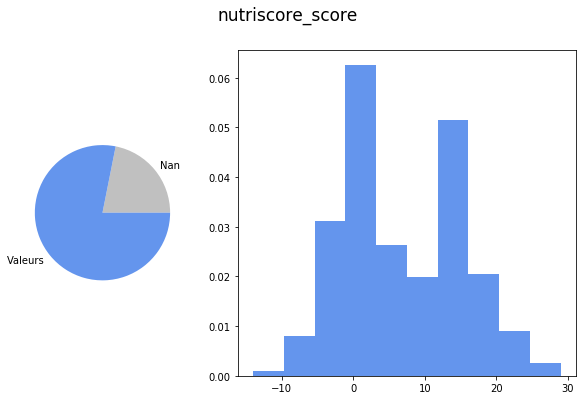

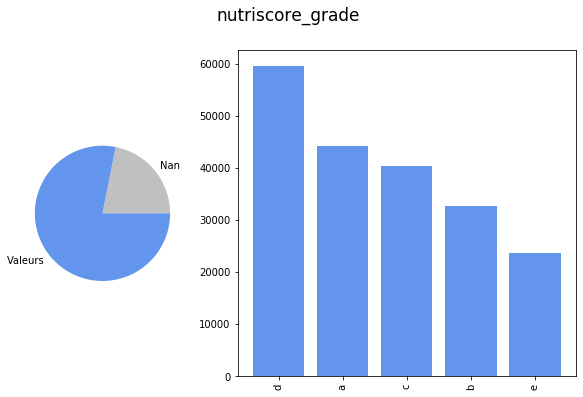

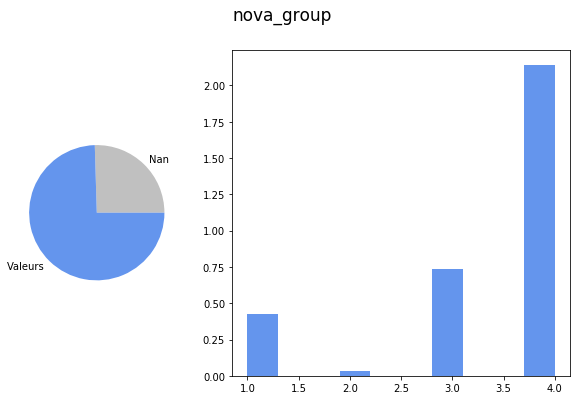

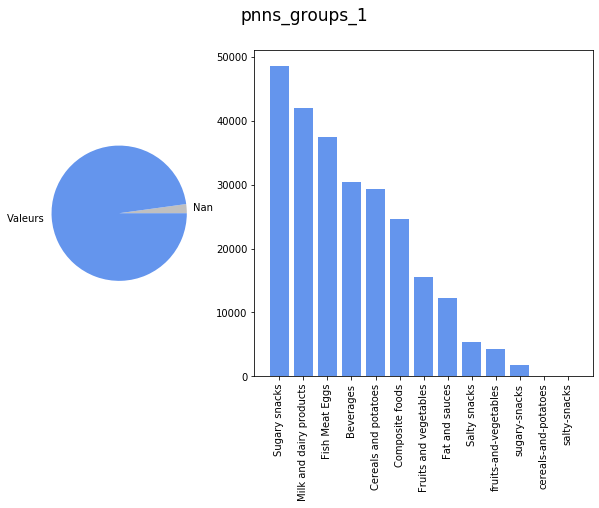

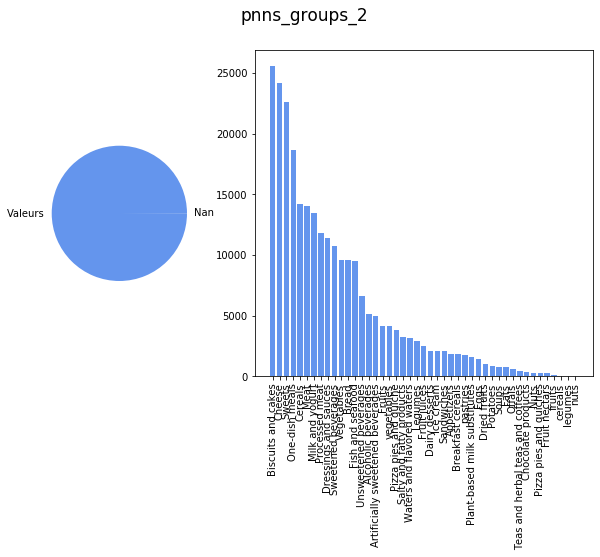

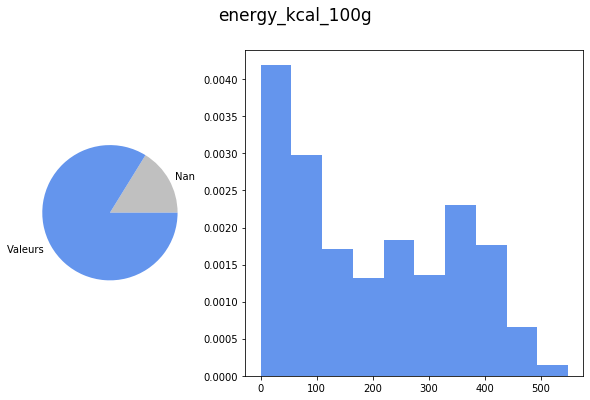

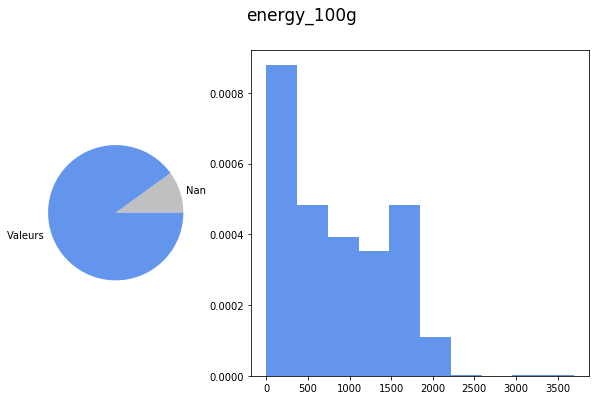

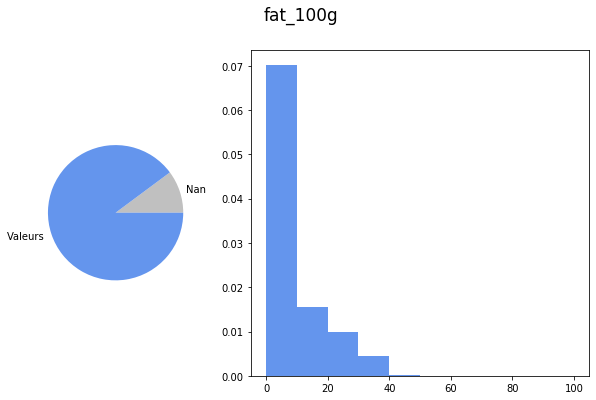

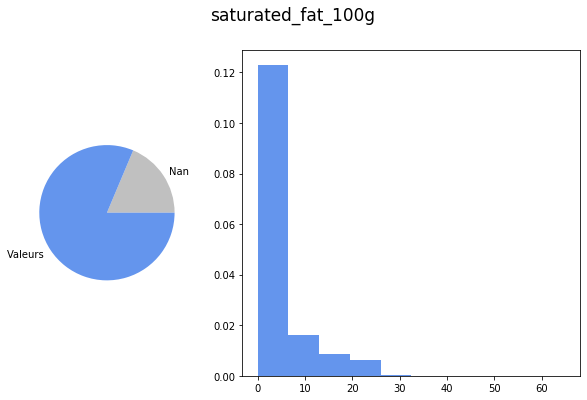

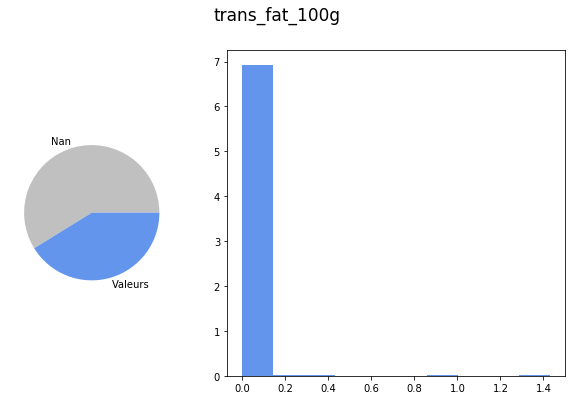

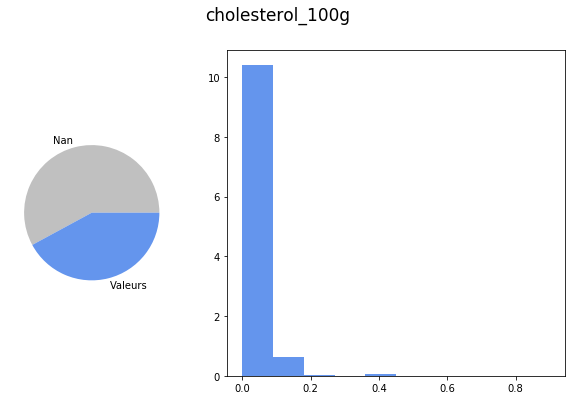

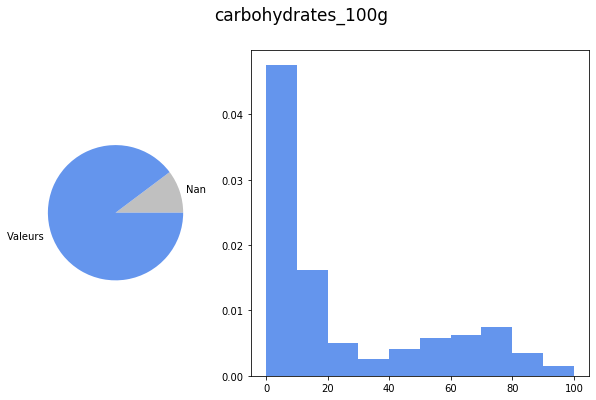

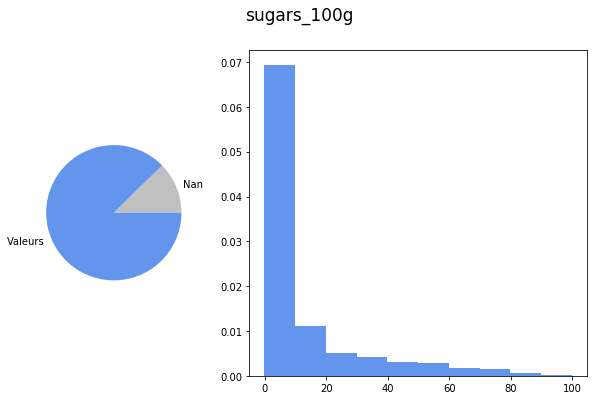

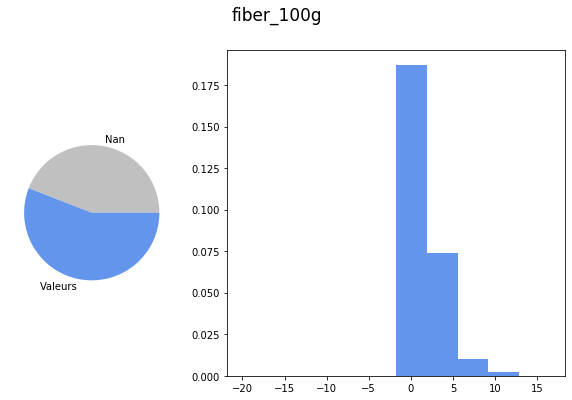

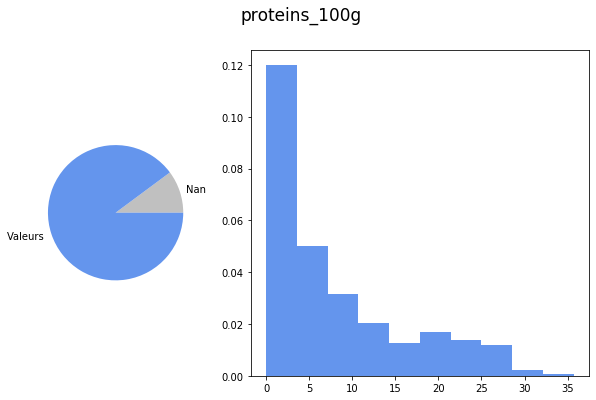

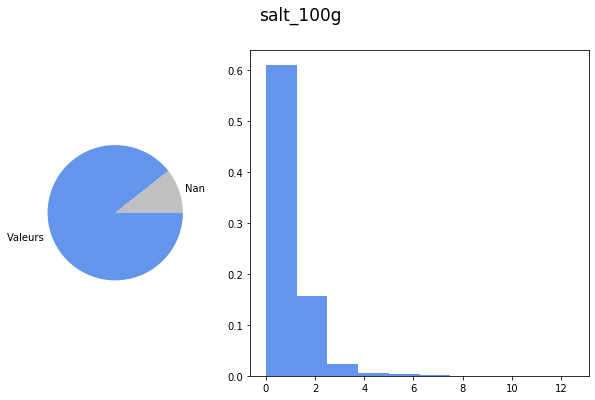

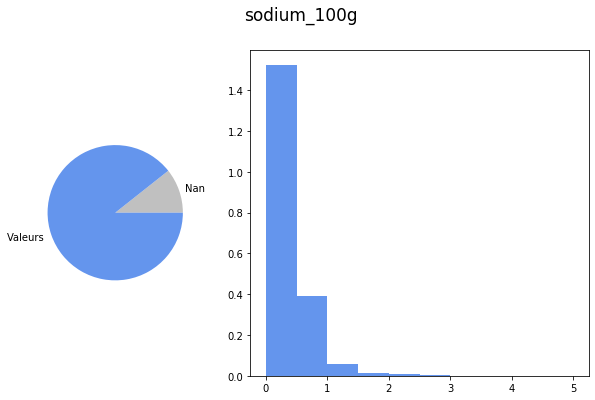

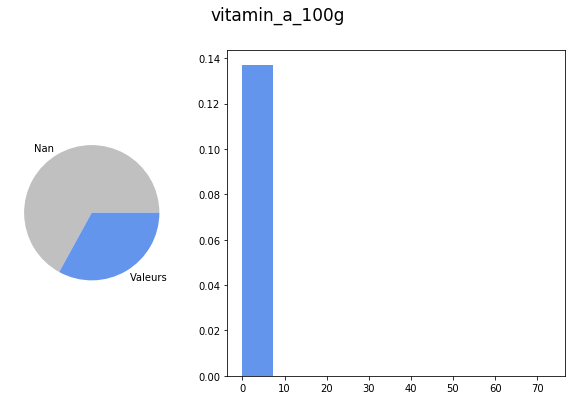

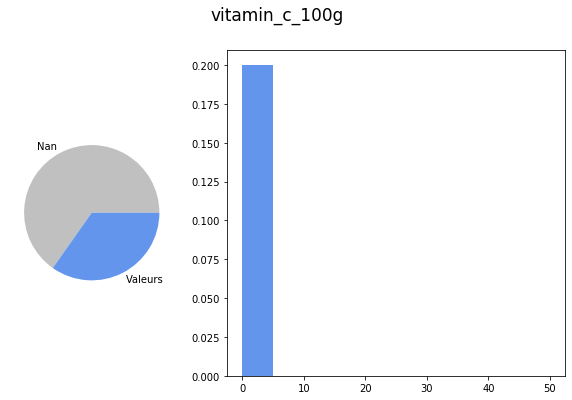

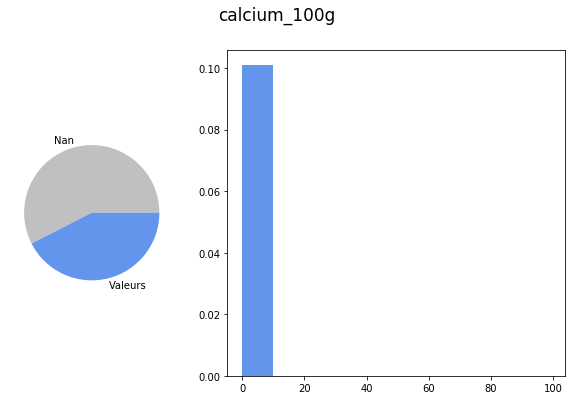

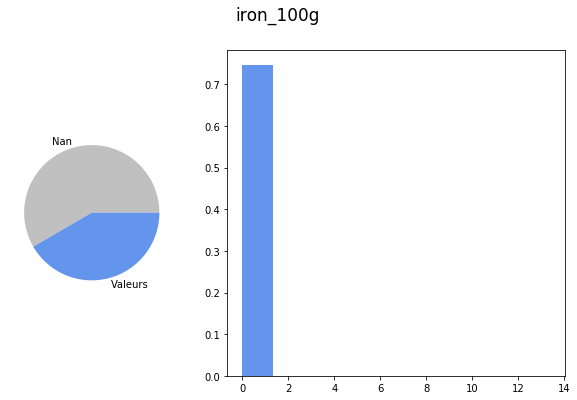

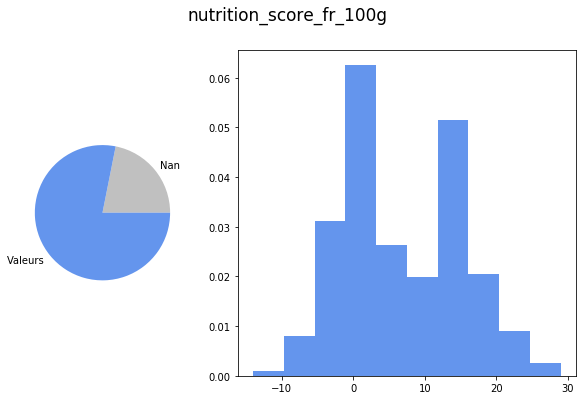

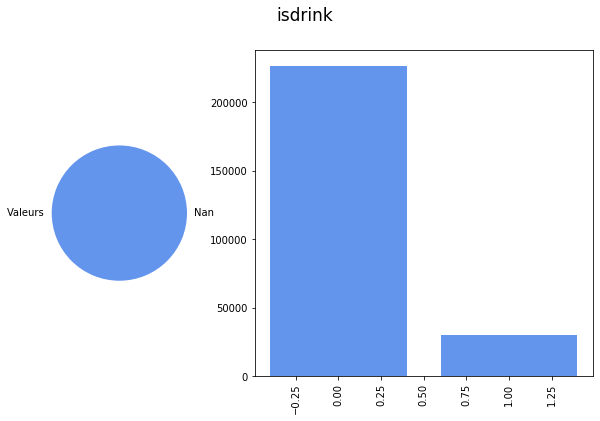

In [32]:
for i in data1.columns.tolist():
    if all(isinstance(e, (int, float)) for e in data1[i].unique()):
        val_na = data1[i].isna().sum()/len(data1[i])
        val_non_na = 1 - val_na
        fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]},figsize=(10,6))
        fig.suptitle(i, fontsize=17)
        ax1.pie([val_na, val_non_na], labels = ['Nan', 'Valeurs'], colors=['silver', 'cornflowerblue'])
        ax2.hist(data1[i], density=True, color=['cornflowerblue'])
        plt.show()        
    else:
        if len(data1[i].unique()) < 50:
            nombre_vals = data1[i].value_counts()
            val_na = data1[i].isna().sum()/len(data1[i])
            val_non_na = 1 - val_na
            fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]},figsize=(10,6))
            fig.suptitle(i, fontsize=17)
            ax1.pie([val_na, val_non_na], labels = ['Nan', 'Valeurs'], colors=['silver', 'cornflowerblue'])
            ax2.bar(nombre_vals.index, nombre_vals.values, color=['cornflowerblue'])
            plt.xticks(rotation=90)  
            plt.show()

Describe: examen de la répartition des individus pour les différentes variables numériques.

In [32]:
for c in Données_numériques:
    print(c)
    print(data1[c].describe())

serving_quantity
count    160080.000000
mean        121.649927
std         930.128946
min           0.000000
25%          32.000000
50%          83.000000
75%         170.000000
max      355000.000000
Name: serving_quantity, dtype: float64
additives_n
count    202614.000000
mean          2.382520
std           3.350239
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          38.000000
Name: additives_n, dtype: float64
ingredients_from_palm_oil_n
count    202614.000000
mean          0.009303
std           0.096926
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64
ingredients_that_may_be_from_palm_oil_n
count    202614.000000
mean          0.061467
std           0.281070
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: ingredients_that_may_be_from_palm_oil_

Je continue avec des boxplots par nutrigrade, couplés à une ANOVA.  
Je sépare les boissons et les autres individus.

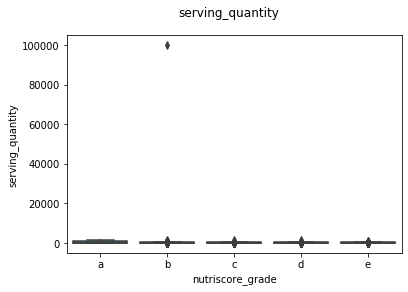

                        sum_sq       df         F    PR(>F)
nutriscore_grade  2.490564e+07      4.0  6.661054  0.000024
Residual          1.011305e+10  10819.0       NaN       NaN


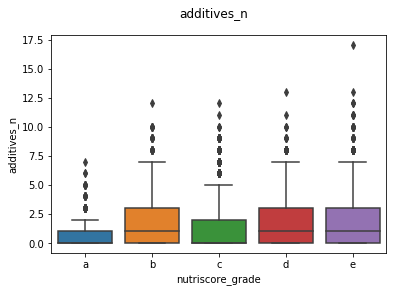

                        sum_sq       df          F        PR(>F)
nutriscore_grade    818.042243      4.0  51.202583  7.164405e-43
Residual          56149.695366  14058.0        NaN           NaN


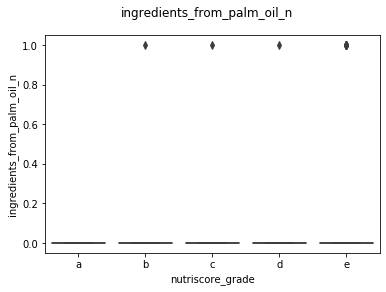

                     sum_sq       df         F    PR(>F)
nutriscore_grade   0.005745      4.0  1.555223  0.183313
Residual          12.982238  14058.0       NaN       NaN


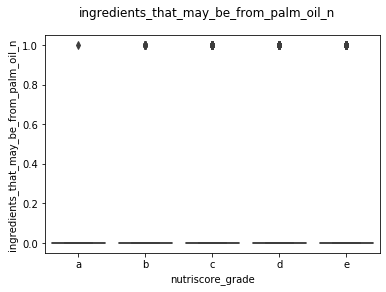

                      sum_sq       df          F        PR(>F)
nutriscore_grade    4.185099      4.0  36.643942  1.594910e-30
Residual          401.390525  14058.0        NaN           NaN


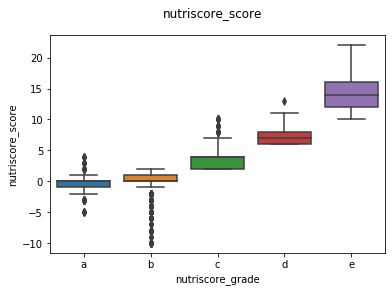

                         sum_sq       df             F  PR(>F)
nutriscore_grade  533456.339087      4.0  34375.646134     0.0
Residual           60444.316672  15580.0           NaN     NaN


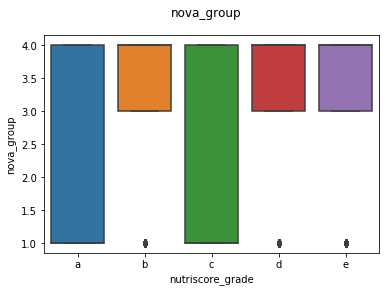

                        sum_sq       df           F  PR(>F)
nutriscore_grade   2737.460129      4.0  437.780751     0.0
Residual          20627.212523  13195.0         NaN     NaN


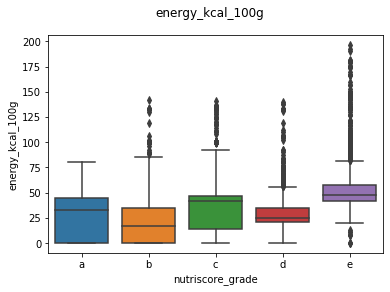

                        sum_sq       df            F  PR(>F)
nutriscore_grade  2.013697e+06      4.0  1163.124633     0.0
Residual          6.192365e+06  14307.0          NaN     NaN


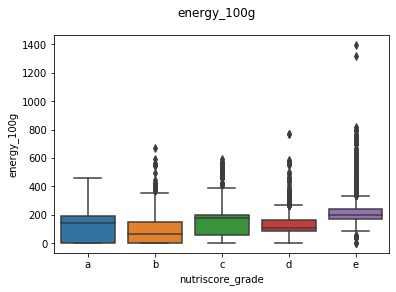

                        sum_sq       df           F  PR(>F)
nutriscore_grade  3.645765e+07      4.0  1176.48654     0.0
Residual          1.182137e+08  15259.0         NaN     NaN


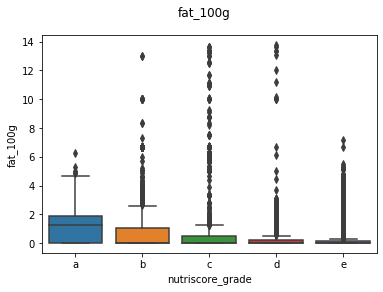

                        sum_sq       df           F         PR(>F)
nutriscore_grade    700.907576      4.0  130.037345  2.168030e-109
Residual          20557.644359  15256.0         NaN            NaN


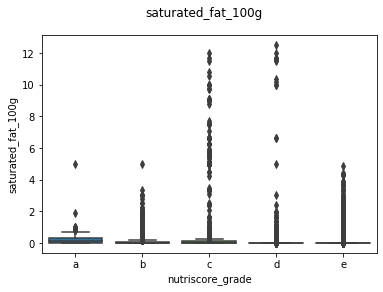

                       sum_sq       df          F        PR(>F)
nutriscore_grade    62.774110      4.0  32.199956  9.139563e-27
Residual          7431.041743  15247.0        NaN           NaN


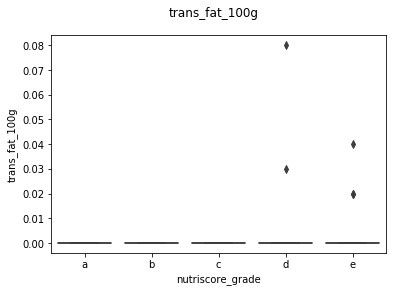

                    sum_sq      df         F    PR(>F)
nutriscore_grade  0.000007     4.0  1.244609  0.289621
Residual          0.009689  7379.0       NaN       NaN


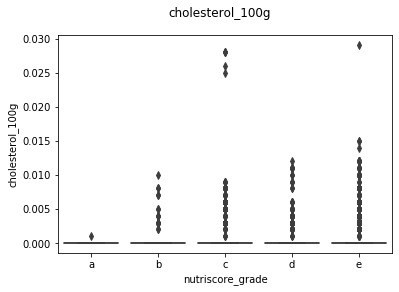

                    sum_sq      df          F        PR(>F)
nutriscore_grade  0.000691     4.0  49.778839  2.093369e-41
Residual          0.025891  7458.0        NaN           NaN


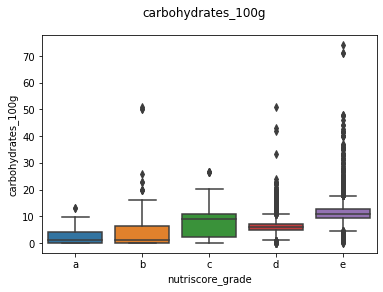

                         sum_sq       df            F  PR(>F)
nutriscore_grade  158666.875042      4.0  2504.738358     0.0
Residual          241556.751523  15253.0          NaN     NaN


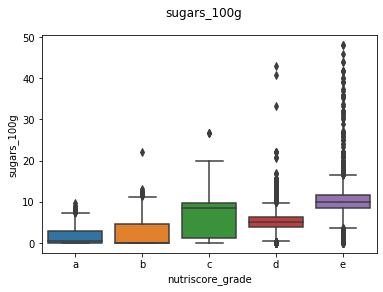

                         sum_sq       df            F  PR(>F)
nutriscore_grade  145862.500859      4.0  2890.018872     0.0
Residual          192383.306920  15247.0          NaN     NaN


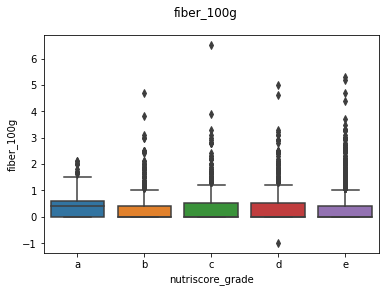

                       sum_sq       df         F        PR(>F)
nutriscore_grade    12.763051      4.0  13.62646  4.401876e-11
Residual          2465.463531  10529.0       NaN           NaN


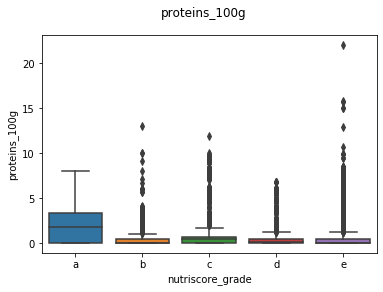

                        sum_sq       df           F         PR(>F)
nutriscore_grade    986.284253      4.0  132.419975  2.201516e-111
Residual          28410.980094  15258.0         NaN            NaN


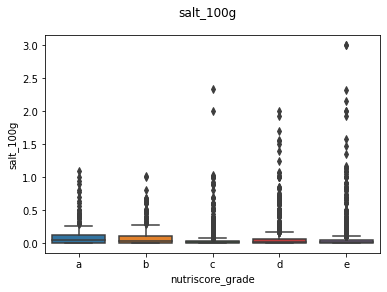

                      sum_sq       df          F        PR(>F)
nutriscore_grade    3.306377      4.0  51.356288  4.993465e-43
Residual          247.110963  15353.0        NaN           NaN


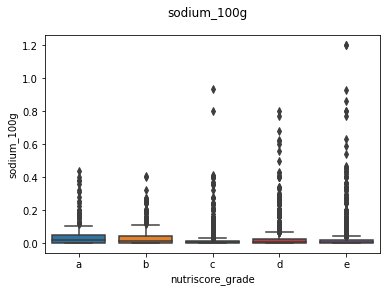

                     sum_sq       df          F        PR(>F)
nutriscore_grade   0.535953      4.0  51.870861  1.826463e-43
Residual          39.658542  15353.0        NaN           NaN


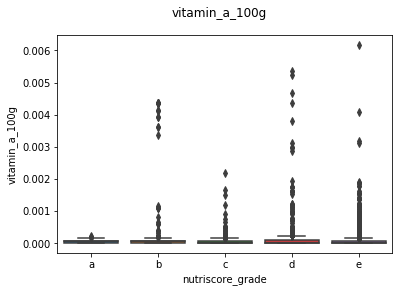

                    sum_sq      df         F    PR(>F)
nutriscore_grade  0.000003     4.0  7.595191  0.000004
Residual          0.000588  5267.0       NaN       NaN


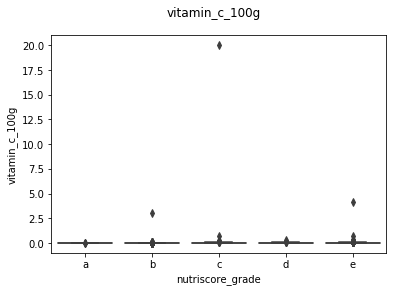

                      sum_sq      df         F   PR(>F)
nutriscore_grade    0.463513     4.0  1.808886  0.12409
Residual          428.308454  6686.0       NaN      NaN


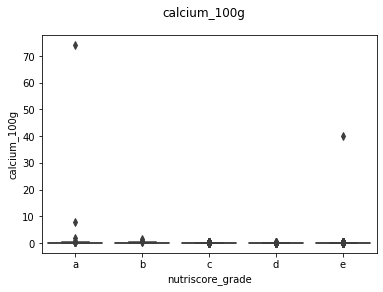

                       sum_sq      df        F    PR(>F)
nutriscore_grade    21.785991     4.0  5.68169  0.000146
Residual          7140.650993  7449.0      NaN       NaN


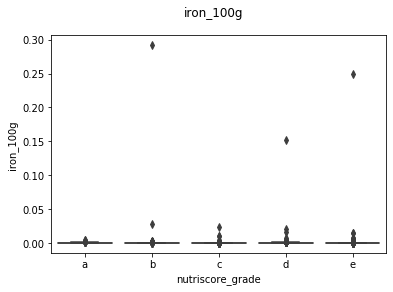

                    sum_sq      df         F    PR(>F)
nutriscore_grade  0.000038     4.0  0.368337  0.831342
Residual          0.174297  6757.0       NaN       NaN


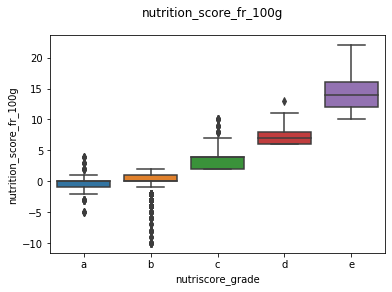

                         sum_sq       df             F  PR(>F)
nutriscore_grade  533456.339087      4.0  34375.646134     0.0
Residual           60444.316672  15580.0           NaN     NaN


In [33]:
for c in Données_numériques:
    sns.boxplot(y = c,  data = data1[data1['isdrink'] == True], x = 'nutriscore_grade', order = ['a', 'b', 'c', 'd', 'e'])
    plt.suptitle(c)
    plt.show()
    print(sm.stats.anova_lm(smf.ols(c + '~' +'nutriscore_grade', data = data1[data1['isdrink'] == True]).fit(), typ=2))

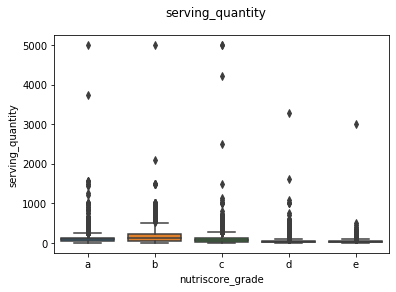

                        sum_sq        df            F  PR(>F)
nutriscore_grade  1.482896e+08       4.0  5591.832802     0.0
Residual          8.018403e+08  120946.0          NaN     NaN


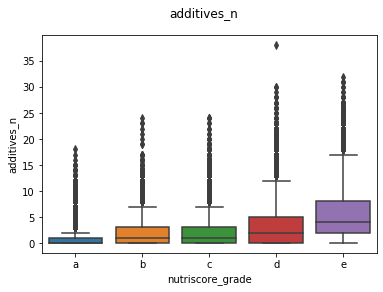

                        sum_sq        df            F  PR(>F)
nutriscore_grade  3.019029e+05       4.0  7194.538134     0.0
Residual          1.589876e+06  151551.0          NaN     NaN


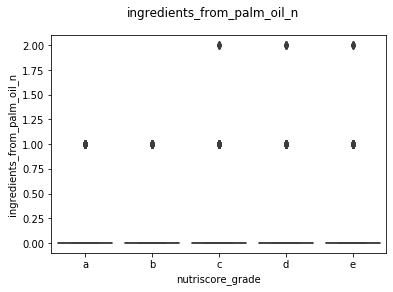

                       sum_sq        df           F  PR(>F)
nutriscore_grade    23.634170       4.0  535.024202     0.0
Residual          1673.654225  151551.0         NaN     NaN


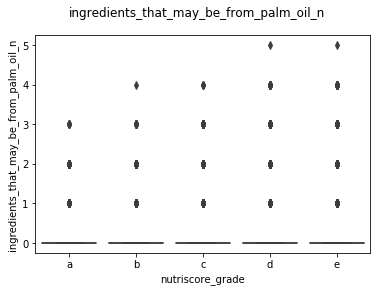

                        sum_sq        df           F  PR(>F)
nutriscore_grade    261.373175       4.0  736.927246     0.0
Residual          13438.017888  151551.0         NaN     NaN


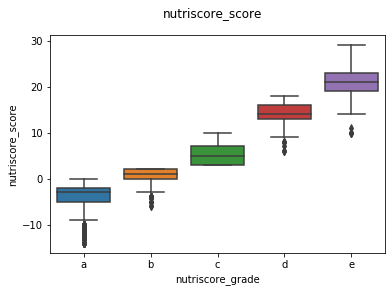

                        sum_sq        df             F  PR(>F)
nutriscore_grade  1.271237e+07       4.0  760466.11058     0.0
Residual          7.742314e+05  185261.0           NaN     NaN


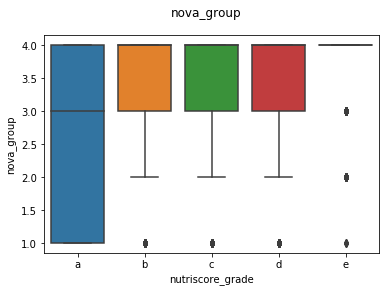

                        sum_sq        df             F  PR(>F)
nutriscore_grade  34786.596736       4.0  12898.623931     0.0
Residual          97553.102088  144688.0           NaN     NaN


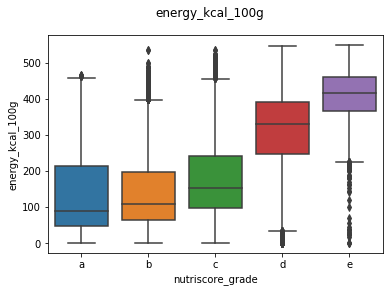

                        sum_sq        df             F  PR(>F)
nutriscore_grade  1.554826e+09       4.0  37858.827214     0.0
Residual          1.758125e+09  171236.0           NaN     NaN


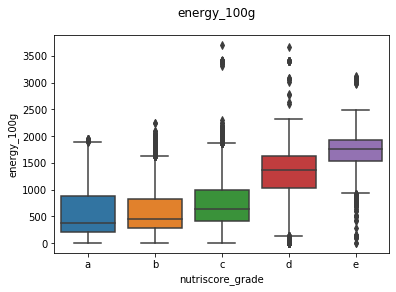

                        sum_sq        df             F  PR(>F)
nutriscore_grade  2.908272e+10       4.0  39956.245632     0.0
Residual          3.370975e+10  185253.0           NaN     NaN


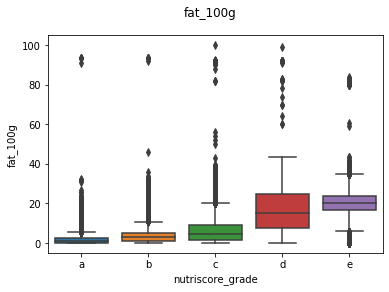

                        sum_sq        df             F  PR(>F)
nutriscore_grade  8.369933e+06       4.0  36658.583866     0.0
Residual          1.057430e+07  185253.0           NaN     NaN


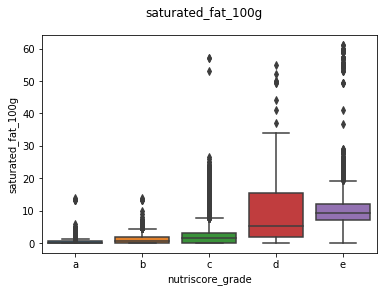

                        sum_sq        df             F  PR(>F)
nutriscore_grade  2.633904e+06       4.0  29045.863527     0.0
Residual          4.199726e+06  185253.0           NaN     NaN


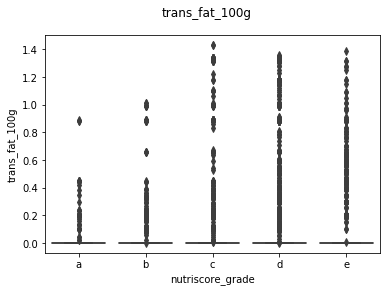

                      sum_sq       df          F        PR(>F)
nutriscore_grade    1.870972      4.0  92.258148  1.948080e-78
Residual          475.230536  93735.0        NaN           NaN


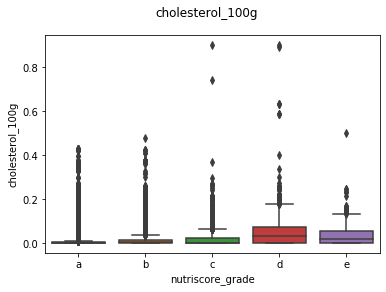

                      sum_sq       df            F  PR(>F)
nutriscore_grade   12.750422      4.0  2169.747388     0.0
Residual          140.203393  95434.0          NaN     NaN


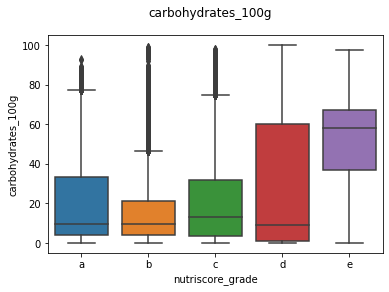

                        sum_sq        df            F  PR(>F)
nutriscore_grade  1.233589e+07       4.0  4234.225469     0.0
Residual          1.348900e+08  185201.0          NaN     NaN


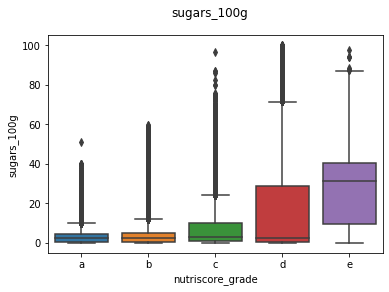

                        sum_sq        df             F  PR(>F)
nutriscore_grade  1.131650e+07       4.0  11543.741392     0.0
Residual          4.540157e+07  185253.0           NaN     NaN


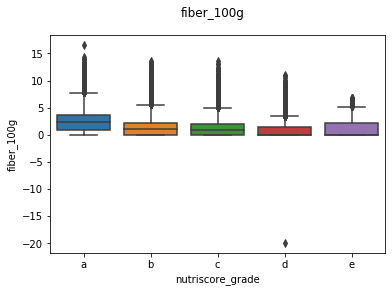

                         sum_sq        df           F  PR(>F)
nutriscore_grade   70430.817854       4.0  5090.56976     0.0
Residual          439679.852349  127116.0         NaN     NaN


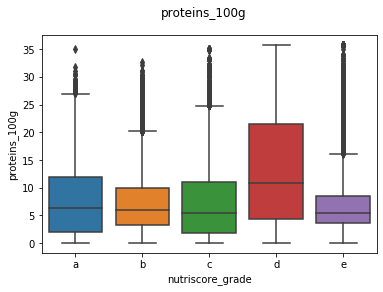

                        sum_sq        df            F  PR(>F)
nutriscore_grade  9.114531e+05       4.0  3869.049493     0.0
Residual          1.091026e+07  185253.0          NaN     NaN


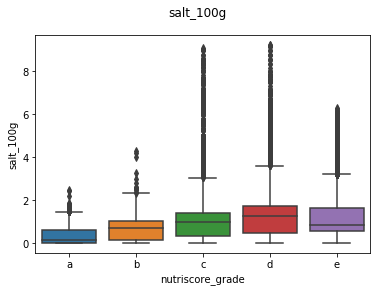

                         sum_sq        df             F  PR(>F)
nutriscore_grade   25290.523890       4.0  10486.590881     0.0
Residual          111693.720953  185253.0           NaN     NaN


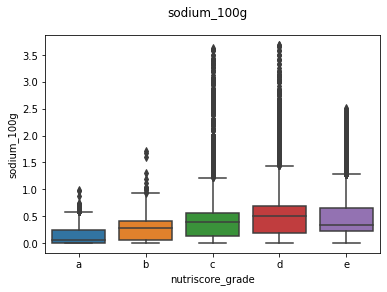

                        sum_sq        df             F  PR(>F)
nutriscore_grade   4046.450942       4.0  10486.611213     0.0
Residual          17870.815488  185253.0           NaN     NaN


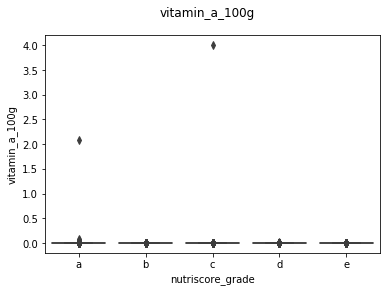

                     sum_sq       df         F    PR(>F)
nutriscore_grade   0.000986      4.0  0.911818  0.455847
Residual          20.337068  75238.0       NaN       NaN


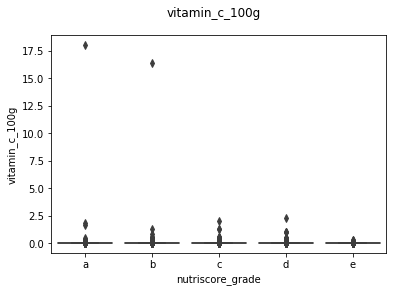

                      sum_sq       df          F        PR(>F)
nutriscore_grade    0.373970      4.0  10.612009  1.354289e-08
Residual          663.697911  75334.0        NaN           NaN


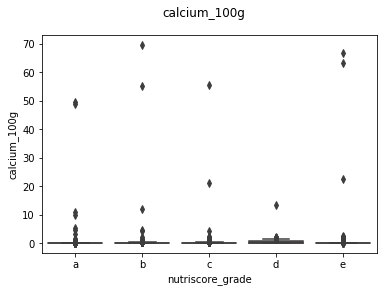

                        sum_sq       df           F  PR(>F)
nutriscore_grade    499.267172      4.0  408.104026     0.0
Residual          29316.211818  95853.0         NaN     NaN


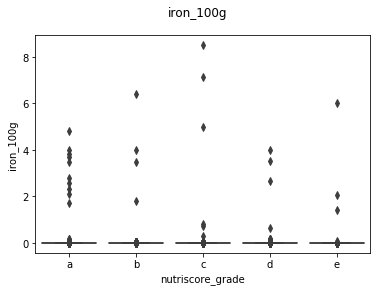

                      sum_sq       df         F    PR(>F)
nutriscore_grade    0.020953      4.0  1.216234  0.301447
Residual          407.424799  94595.0       NaN       NaN


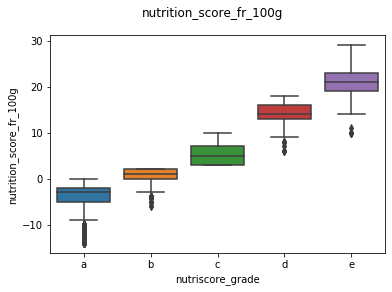

                        sum_sq        df             F  PR(>F)
nutriscore_grade  1.271237e+07       4.0  760466.11058     0.0
Residual          7.742314e+05  185261.0           NaN     NaN


In [34]:
for c in Données_numériques:
    sns.boxplot(y = c,  data = data1[data1['isdrink'] == False], x = 'nutriscore_grade', order = ['a', 'b', 'c', 'd', 'e'])
    plt.suptitle(c)
    plt.show()
    print(sm.stats.anova_lm(smf.ols(c + '~' +'nutriscore_grade', data = data1[data1['isdrink'] == False]).fit(), typ=2))

### (Première) analyse multivariée

A ce moment, il me reste encore une grosse vingtaine de variables, plus ou moins pertinentes.  
Je vais devoir choisir entre elles celles à prendre en compte dans l'analyse.  
Pour fixer les idées, je sors la matrice de corrélation de TOUTES les variables.

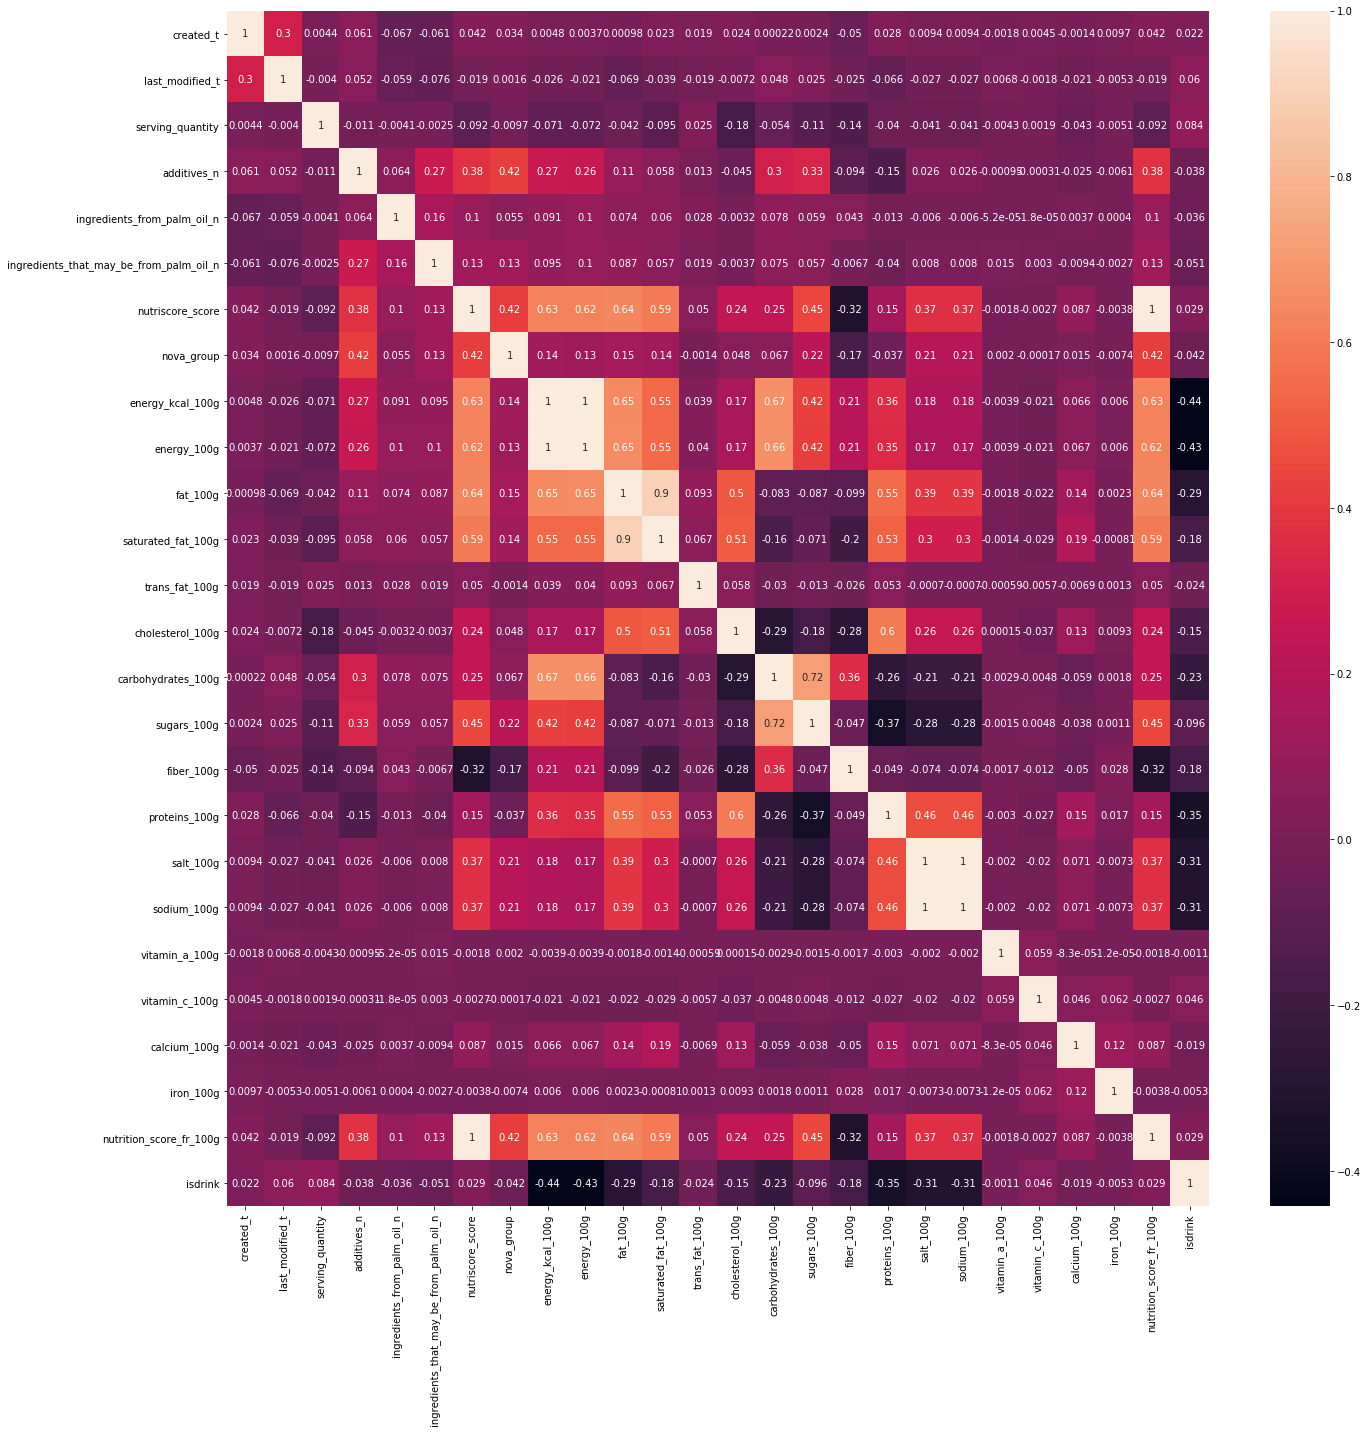

In [35]:
plt.subplots(figsize=(22,22))
data1_mat_corr = data1.corr()
sns.heatmap(data1_mat_corr, annot = True)
plt.show()

J'ai décidé de centrer mon analyse sur le nutriscore.  
Après ces premiers examens, je peux désigner une liste de variables qui ont, ou qui pourraient avoir une influence sur le nutriscore. Ce sont ces variables que j'utiliserai pour la suite du projet.
 - 'additives_n'
 - 'nutriscore_score'
 - 'energy_100g'
 - 'fat_100g'
 - 'saturated_fat_100g'
 - 'carbohydrates_100g'
 - 'sugars_100g'
 - 'fiber_100g'
 - 'proteins_100g'
 - 'vitamin_a_100g'
 - 'vitamin_c_100g'
 - 'calcium_100g'

In [36]:
variables_analyse = ['additives_n', 'nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g',]

### Gestion des valeurs manquantes

De nombreuses valeurs manquent.  
On va essayer, dans la mesure du possible, de combler ce manque.  
Plusieurs tactiques vont être employées:
 - Si la variable est fortement corrélée à une ou plusieurs autres variables (ou significativement corrélée à plusieurs variables), et si il y a déjà un nombre suffisant d'éléments dans la base pour le faire (l'imperative imputing doit se baser sur quelque chose), on va tenter un iterative imputing (méthode 1),
 - Sinon, si la variable varie peu au sein de la même catégorie de produits, on va remplacer par la moyenne par catégorie (méthode 2).
   
Je vais employer, dans l'ordre, la méthode 2 puis la méthode 1.

Voici la matrice de corrélation pour toutes les variables conservées à ce stade:

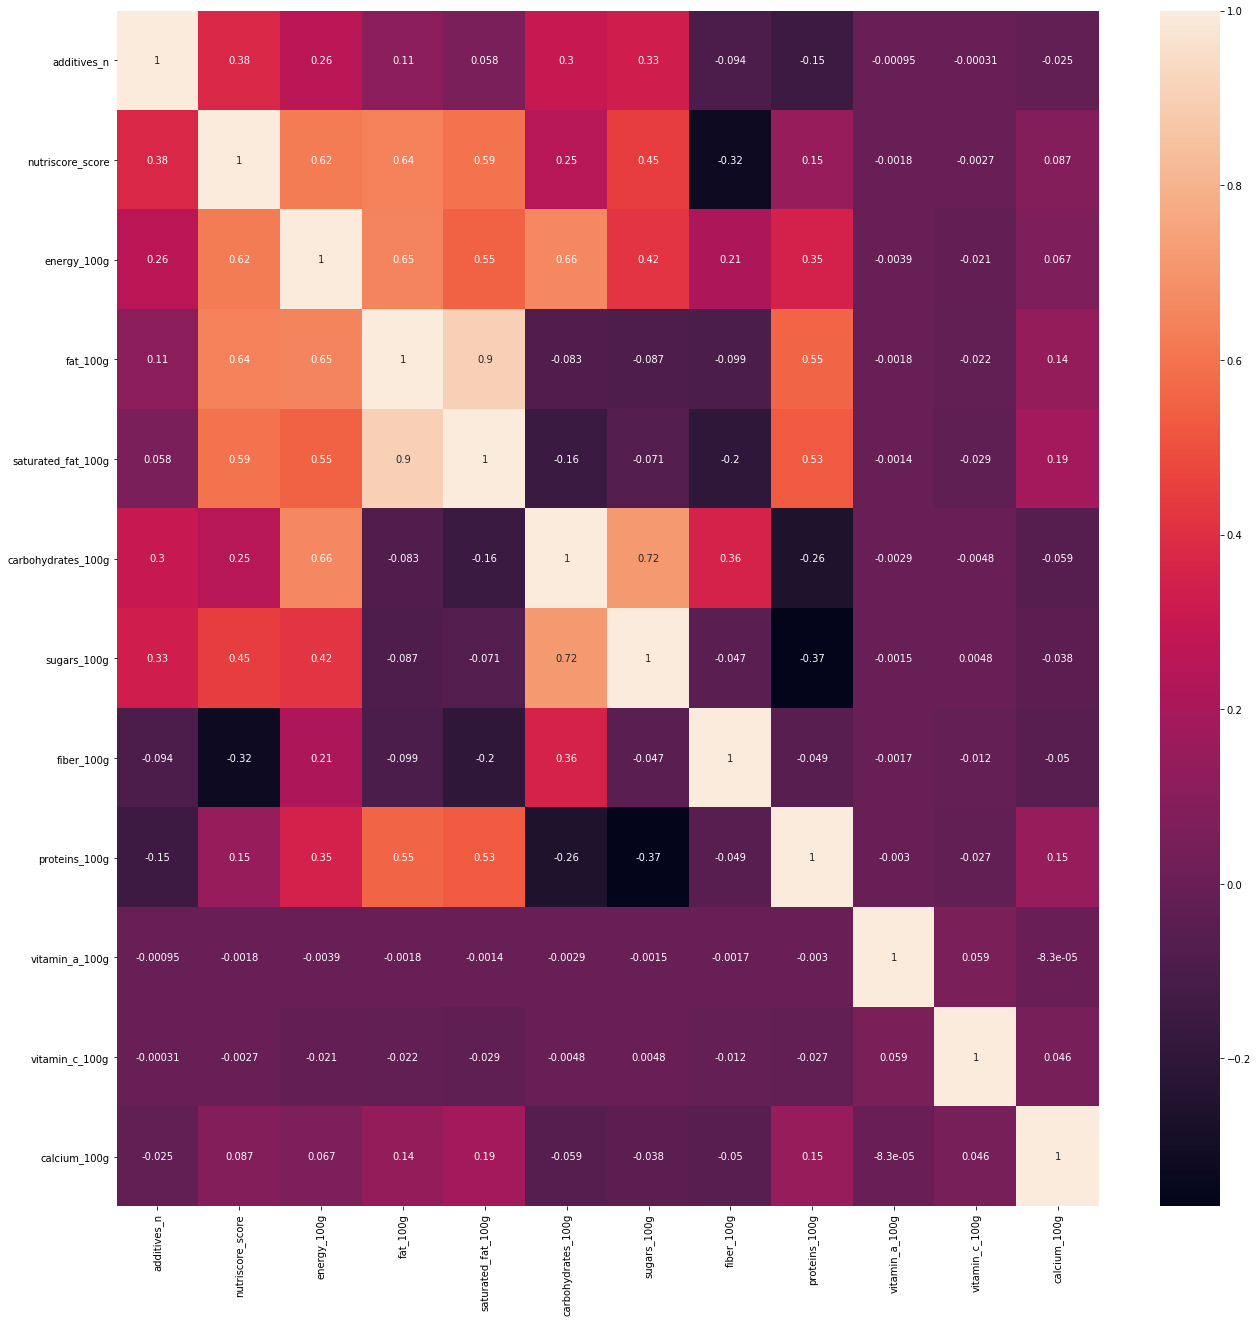

In [37]:
plt.subplots(figsize=(22,22))
data1_mat_corr = data1[variables_analyse].corr()
sns.heatmap(data1_mat_corr, annot = True)
plt.show()

Cette matrice de corrélation est difficilement exploitable dans l'état actuel... mais elle permet de prendre des décisions pour compléter les données manquante.  
Je peux, grâce sélectionner les variables qui vont être complétées par la méthode 1 (iterative imputing) et, par contraste, celles qui devraient plutôt être l'objet de la méthode 2.  
  
Pour la sélection des variables:  
 - Je parcours la ligne de chaque donnée numérique dans la matrice de corrélation.  
 - Je fais des tests de corrélation forte et de corrélation significative.  
 - Si la variable est fortement corrélée ( > 0.75) à une variable ou plus, ou si elle est significativement corrélée (> 0,5) à 2 variables ou plus, je l'inclus à la liste pour la méthode 1.    

additives_n:
Corrélation forte: 
[]
Corrélation significative: 
[]
  
nutriscore_score:
Corrélation forte: 
[]
Corrélation significative: 
['energy_100g', 'fat_100g', 'saturated_fat_100g']
  


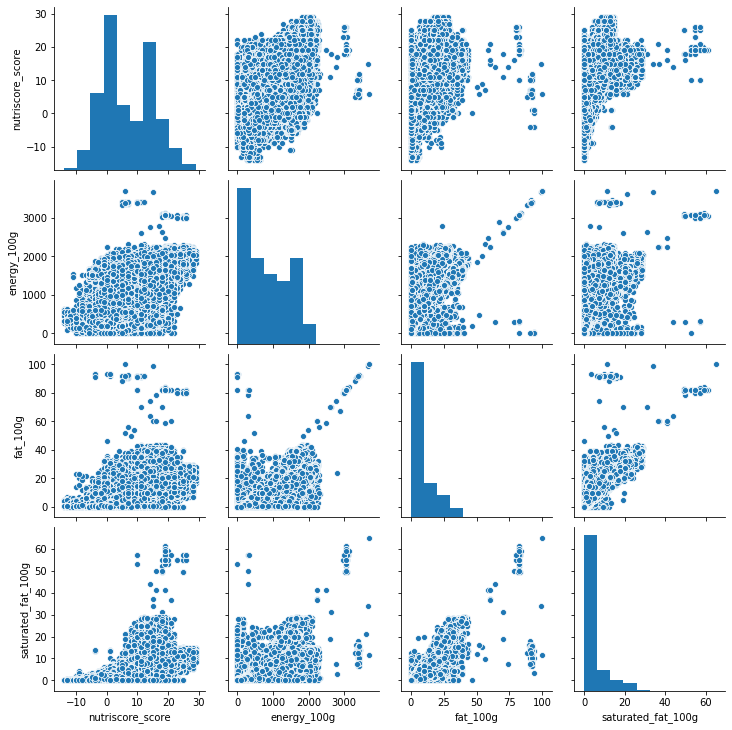

energy_100g:
Corrélation forte: 
[]
Corrélation significative: 
['nutriscore_score', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g']
  


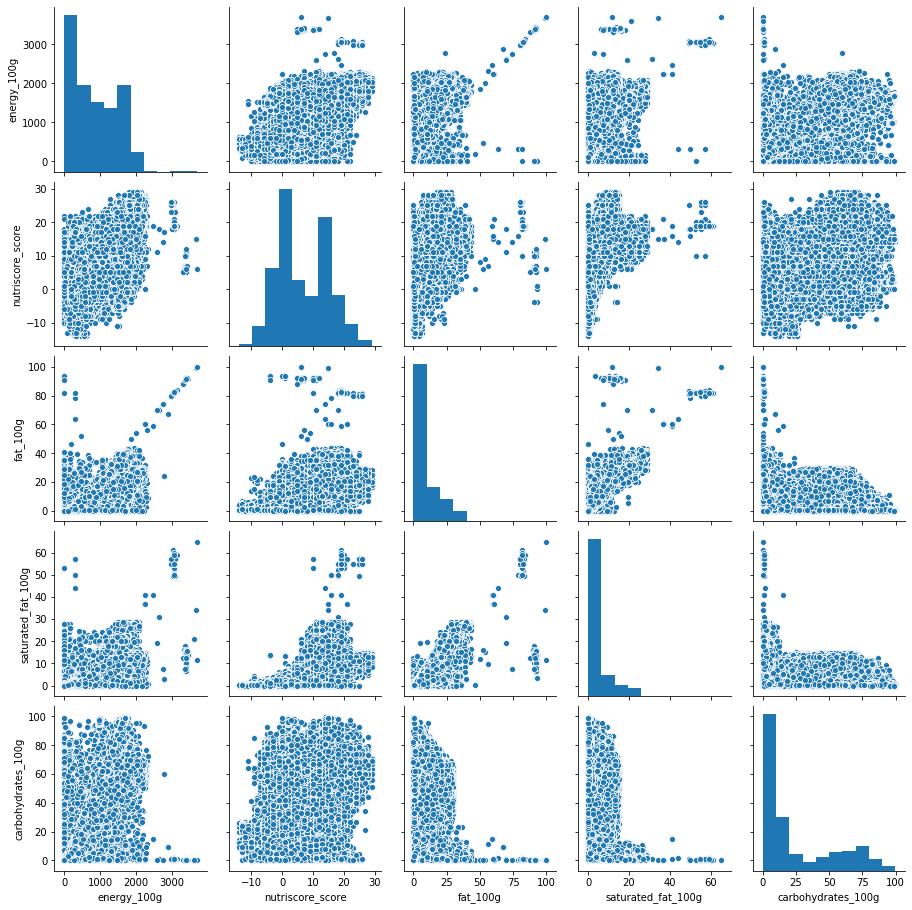

fat_100g:
Corrélation forte: 
['saturated_fat_100g']
Corrélation significative: 
['nutriscore_score', 'energy_100g', 'proteins_100g']
  


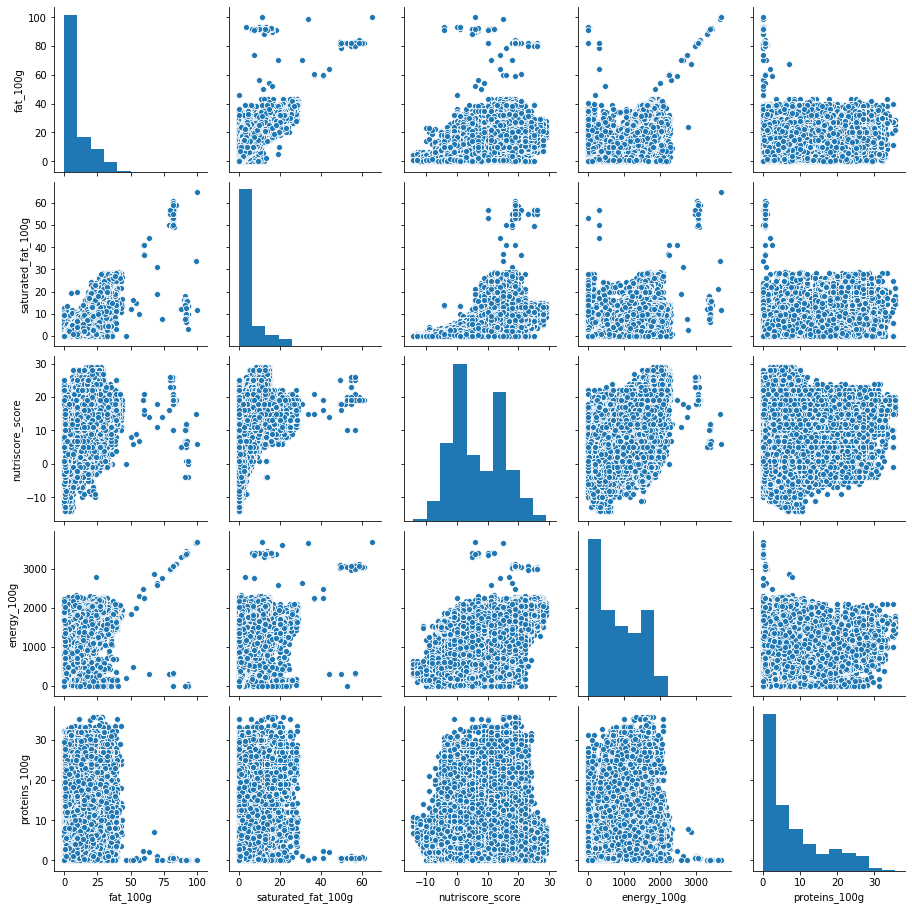

saturated_fat_100g:
Corrélation forte: 
['fat_100g']
Corrélation significative: 
['nutriscore_score', 'energy_100g', 'proteins_100g']
  


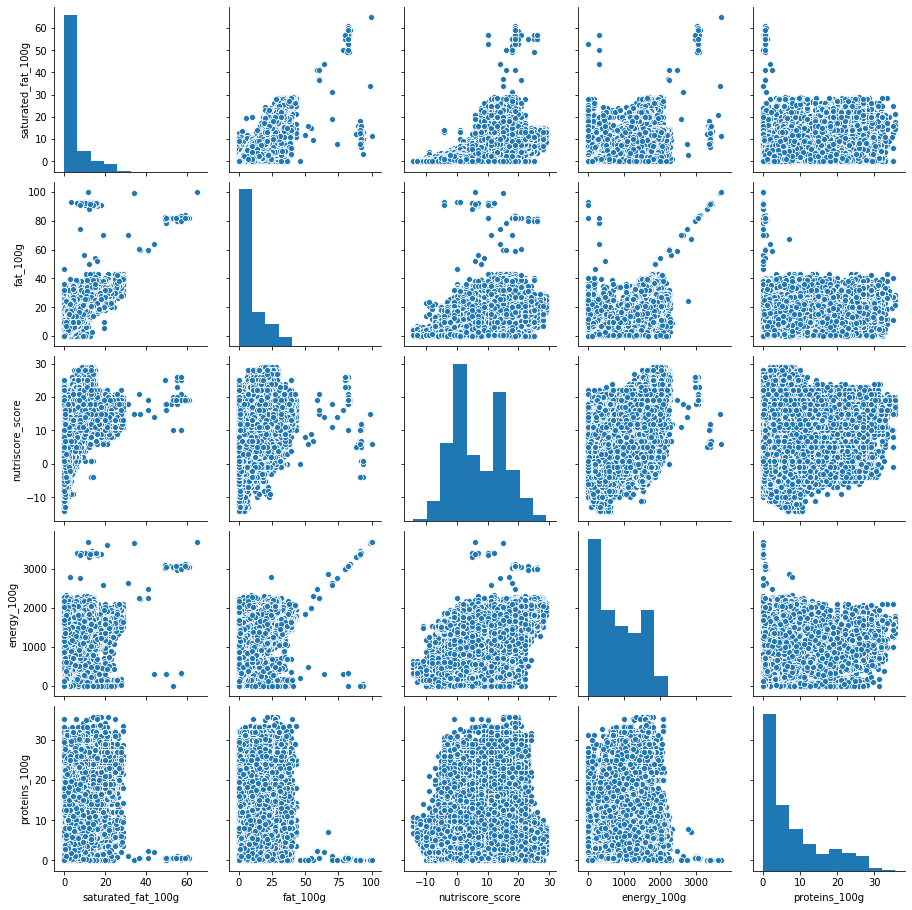

carbohydrates_100g:
Corrélation forte: 
[]
Corrélation significative: 
['energy_100g', 'sugars_100g']
  


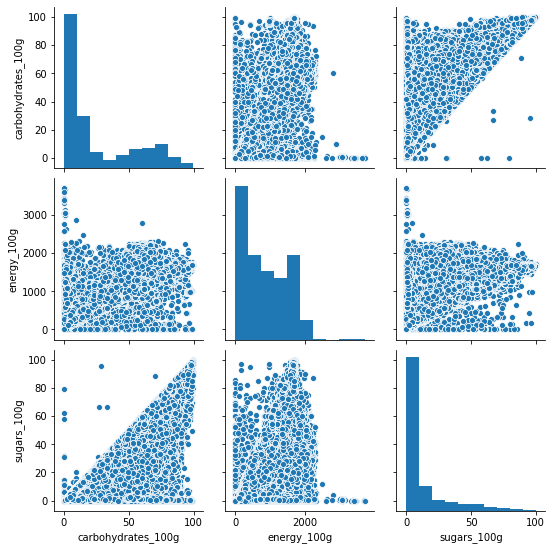

sugars_100g:
Corrélation forte: 
[]
Corrélation significative: 
['carbohydrates_100g']
  
fiber_100g:
Corrélation forte: 
[]
Corrélation significative: 
[]
  
proteins_100g:
Corrélation forte: 
[]
Corrélation significative: 
['fat_100g', 'saturated_fat_100g']
  


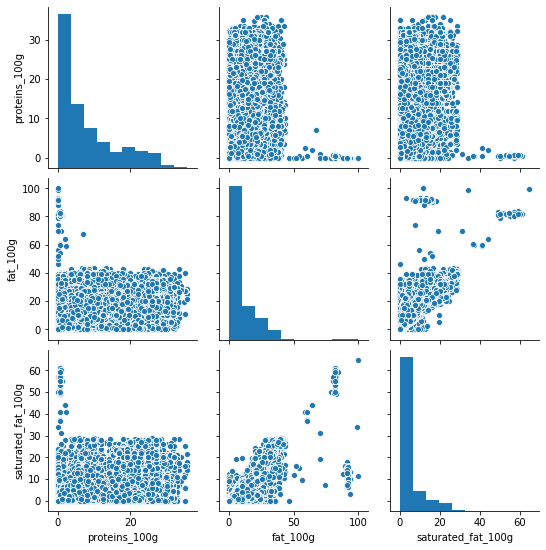

vitamin_a_100g:
Corrélation forte: 
[]
Corrélation significative: 
[]
  
vitamin_c_100g:
Corrélation forte: 
[]
Corrélation significative: 
[]
  
calcium_100g:
Corrélation forte: 
[]
Corrélation significative: 
[]
  
Sur 12 variables numériques, 6 variables ont été sélectionnées pour l iterative imputing:
dict_keys(['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'proteins_100g'])


In [38]:
lim_corr_forte = 0.75
lim_corr_signif = 0.5

sélection_corrélations = {}

for k in variables_analyse:
    corr_forte = []
    corr_signif = []
    for l in variables_analyse:
        if l == k:
            continue
        if data1_mat_corr[k].loc[l] >= lim_corr_forte:
            corr_forte.append(l)
        if lim_corr_forte >= data1_mat_corr[k].loc[l] >= lim_corr_signif:
            corr_signif.append(l)
    print(k + ':')
    print('Corrélation forte: ')
    print(corr_forte)
    print('Corrélation significative: ')
    print(corr_signif)
    print('  ')
    if (len(corr_forte + corr_signif) > 1) or (len(corr_forte) > 0) :
        sélection_corrélations[k] = corr_forte + corr_signif
        sns.pairplot(data1[[k] + corr_forte + corr_signif])
        plt.show()

l = len(data1)
for k in list(sélection_corrélations.keys()):
       if data1.isna().sum(axis=0)[i]/l > 0.6:
            print(k)
            print(data1.isna().sum(axis=0)[k]/l)
            del sélection_corrélations[k]
        
print('Sur '+ str(len(variables_analyse)) + ' variables numériques, ' + str(len(sélection_corrélations.keys())) + ' variables ont été sélectionnées pour l iterative imputing:')
print(sélection_corrélations.keys())

##### Méthode 2: variables insuffisamment corrélées.  
  
J'examine la répartition des variables peu corrélées dans chacun des pnns_groups_2.

In [39]:
print('Les variables peu corrélées sont: ')
for k in variables_analyse:
    if not(k in list(sélection_corrélations.keys())):
        print(k)

Les variables peu corrélées sont: 
additives_n
sugars_100g
fiber_100g
vitamin_a_100g
vitamin_c_100g
calcium_100g


In [40]:
for k in variables_analyse:
    if not(k in list(sélection_corrélations.keys())):
        print(k)
        print(data1[k].describe())
        print(data1.groupby(['pnns_groups_2'])[k].describe())
        print('  ')
        print('  ')
        

additives_n
count    202614.000000
mean          2.382520
std           3.350239
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          38.000000
Name: additives_n, dtype: float64
                                    count      mean       std  min  25%  50%  \
pnns_groups_2                                                                  
Alcoholic beverages                2532.0  0.560032  1.512737  0.0  0.0  0.0   
Appetizers                         1318.0  2.041730  2.547455  0.0  0.0  1.0   
Artificially sweetened beverages   4911.0  5.334148  2.200938  0.0  4.0  5.0   
Biscuits and cakes                22180.0  6.038909  5.438868  0.0  2.0  4.0   
Bread                              8272.0  3.404255  3.261581  0.0  1.0  3.0   
Breakfast cereals                  1422.0  0.758087  1.135066  0.0  0.0  0.0   
Cereals                           12792.0  0.664165  1.656048  0.0  0.0  0.0   
Cheese                            15834.0  1.05993

                                    count      mean       std     min    25%  \
pnns_groups_2                                                                  
Alcoholic beverages                 180.0  0.288989  0.651708   0.000  0.000   
Appetizers                          957.0  3.141014  1.956596   0.000  1.900   
Artificially sweetened beverages   1337.0  0.324141  0.560268   0.000  0.000   
Biscuits and cakes                19411.0  1.786771  1.603780   0.000  0.000   
Bread                              7724.0  3.443979  2.150760   0.000  2.000   
Breakfast cereals                  1355.0  6.456002  3.035614   0.000  4.000   
Cereals                           11861.0  3.870661  2.696108   0.000  2.100   
Cheese                            11538.0  0.033116  0.179418   0.000  0.000   
Chocolate products                  110.0  3.079445  2.870881   0.000  1.000   
Dairy desserts                      811.0  0.458127  0.652774   0.000  0.000   
Dressings and sauces               7585.

                                    count      mean       std     min  \
pnns_groups_2                                                           
Alcoholic beverages                  77.0  0.033109  0.118143  0.0000   
Appetizers                          260.0  0.001743  0.006842  0.0000   
Artificially sweetened beverages   1475.0  0.178087  1.793364  0.0000   
Biscuits and cakes                12711.0  0.002299  0.146493  0.0000   
Bread                              4610.0  0.000972  0.005860  0.0000   
Breakfast cereals                   176.0  0.029669  0.026173  0.0000   
Cereals                            6924.0  0.002054  0.010466  0.0000   
Cheese                             7533.0  0.000377  0.003705  0.0000   
Chocolate products                   77.0  0.000179  0.001002  0.0000   
Dairy desserts                       45.0  0.001307  0.004921  0.0000   
Dressings and sauces               5785.0  0.011535  0.036353  0.0000   
Dried fruits                          6.0  0.011367

En conséquence, je vais remplacer, pour ces variables, les NaN par les moyennes par pnns_groups_2.

In [41]:
data2 = data1.copy()
data2['pnns_groups_2'] = data2['pnns_groups_2'].fillna(-1)
for k in variables_analyse:
    if not(k in list(sélection_corrélations.keys())):
        data2[k] = data2.groupby('pnns_groups_2')[k].transform(lambda x: x.fillna(np.mean(x)))

Toutes les données manquantes ne sont pas complétées, mais la situation est meilleure.

In [42]:
for k in variables_analyse:
    if not(k in list(sélection_corrélations.keys())):
        print(k + ": " + str(data2.isna().sum(axis=0)[k]) + " vides.")

additives_n: 125 vides.
sugars_100g: 125 vides.
fiber_100g: 125 vides.
vitamin_a_100g: 1075 vides.
vitamin_c_100g: 1075 vides.
calcium_100g: 1075 vides.


##### Méthode 1: iterative imputer.  
  
J'applique l'iterative imputer aux variables sélectionnées pour l'analyse.  
Il me restera, après ce calcul, les variables sélectionnées complétées, et l'information boisson/autre.

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
It_Imp = IterativeImputer(missing_values=np.nan, max_iter=1000, imputation_order='ascending', n_nearest_features=6)
It_Imp.fit(data2[['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g']][data2['isdrink'] == True].values)
It_Imp_result = It_Imp.transform(data2[['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g']][data2['isdrink'] == True].values)
data3a = pd.DataFrame(It_Imp_result, columns = ['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g'])
data3a['isdrink'] = True

In [45]:
It_Imp = IterativeImputer(missing_values=np.nan, max_iter=1000, imputation_order='ascending', n_nearest_features=6)
It_Imp.fit(data2[['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g']][data2['isdrink'] == False].values)
It_Imp_result = It_Imp.transform(data2[['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g']][data2['isdrink'] == False].values)
data3b = pd.DataFrame(It_Imp_result, columns = ['nutriscore_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g'])
data3b['isdrink'] = False

C:\Users\vince\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [46]:
data3 = pd.concat([data3a, data3b], ignore_index=True)

In [47]:
for k in data3.columns.tolist():
    print(k + ": " + str(data3.isna().sum(axis=0)[k]) + " vides.")

nutriscore_score: 0 vides.
energy_100g: 0 vides.
fat_100g: 0 vides.
saturated_fat_100g: 0 vides.
carbohydrates_100g: 0 vides.
sugars_100g: 0 vides.
proteins_100g: 0 vides.
fiber_100g: 0 vides.
isdrink: 0 vides.


Sur la base des informations officielles sur le datascore, j'attribue de nouveau le nutrigrade à chaque individu.

In [48]:
def nutriscore_to_grade (row):
    output = 'f'
    if row['isdrink'] == False:
        if row['nutriscore_score'] < 0:
            output = 'a'
        else:
            if row['nutriscore_score'] < 3:
                output = 'b'
            else:
                if row['nutriscore_score'] < 11:
                    output = 'c'
                else:
                    if row['nutriscore_score'] < 19:
                        output = 'd'
                    else:
                        output = 'e'
    if row['isdrink'] == True:
        if row['nutriscore_score'] < 0:
            output = 'b'
        else:
            if row['nutriscore_score'] < 3:
                output = 'c'
            else:
                if row['nutriscore_score'] < 11:
                    output = 'd'
                else:
                    output = 'e'
    return output

In [49]:
data3['nutriscore_grade'] = data3.apply(lambda x : nutriscore_to_grade(x), axis = 1)

Il est possible que des individus aux valeurs recalculées dépassent maintenant les limites de 100g déjà appliquées précédemment. J'effectue un nouveau nettoyage.

In [50]:
def check_100g_3 (row):
    check = False
    for i in ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'fiber_100g']:
        if i.endswith('100g') and not(i.startswith('energy') or i.startswith('carbon') or i.startswith('nutrition')):
            if row[i] > 100:
                check = True
    return check
def check_100g_somme_3 (row):
    check = False
    if ( (row['fat_100g'] + row['sugars_100g'] + row['fiber_100g'] + row['proteins_100g']) > 100):
        check = True
    return check

In [51]:
data3['check_100g'] = data3.apply(lambda x: check_100g_3(x), axis = 1)

In [52]:
print("Exclu: " + str(len(data3[data3['check_100g'] == True])) + " sur " + str(len(data3)))

Exclu: 1 sur 257077


In [53]:
data3['check_100g_somme'] = data3.apply(lambda x: check_100g_somme_3(x), axis = 1)

In [54]:
print("Exclu: " + str(len(data3[data3['check_100g_somme'] == True])) + " sur " + str(len(data3)))

Exclu: 38 sur 257077


In [55]:
data3.drop(data3[data3['check_100g']==True].index, inplace=True)
data3.drop(data3[data3['check_100g_somme']==True].index, inplace=True)
data3 = data3.drop(columns = ['check_100g'])
data3 = data3.drop(columns = ['check_100g_somme'])

J'exporte la base nettoyée dans un fichier csv nommé data3, pour l'utiliser dans la partie analyse du projet.

In [56]:
data3.to_csv('./data3.csv', index=False)